# Modeling

## Visual Python Upgrade
NOTE: 
- Refresh your web browser to start a new version.
- Save VP Note before refreshing the page.

**Libraries**

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")

import matplotlib.pyplot as plt
%matplotlib inline
# Set default font size
plt.rcParams.update({'figure.figsize': (10, 10), 'figure.dpi': 50, 'font.size': 10})
plt.style.use('fivethirtyeight')
#plt.rcParams['font.size'] = 10
clock_0 =time.time()

In [2]:
print( "Pandas", pd.__version__)
print("Numpy", np.__version__)
#print(plt.__version__)
print("Seaborn",sns.__version__)

Pandas 1.3.5
Numpy 1.21.2
Seaborn 0.11.2


*    Constants and variables

In [3]:
# Constantes
TEST_SIZE = 0.3
RANDOM_STATE = 42
modelado = [] # resultados

## Get data

In [4]:
#tarjeta = pd.read_csv("~/Trabajo_tfm/datos_csv/tarjeta_datos0.csv", index_col='Unnamed: 0') # iter 0
tarjeta = pd.read_csv("~/Trabajo_tfm/datos_csv/tarjeta_datos_0.csv", index_col='Unnamed: 0') # iter 0
tarjeta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7077 entries, 0 to 7076
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fecha              7077 non-null   object 
 1   provincia          7077 non-null   object 
 2   v_muy_cortos       7077 non-null   float64
 3   v_cortos           7077 non-null   float64
 4   v_medios           7077 non-null   float64
 5   v_largos           7077 non-null   float64
 6   v_muy_largos       7077 non-null   float64
 7   v_extra_largos     7077 non-null   float64
 8   v_noche            7077 non-null   float64
 9   v_madrugada        7077 non-null   float64
 10  v_mañana           7077 non-null   float64
 11  v_mediodia         7077 non-null   float64
 12  v_sobremesa        7077 non-null   float64
 13  v_tarde            7077 non-null   float64
 14  v_km_muy_cortos    7077 non-null   float64
 15  v_km_cortos        7077 non-null   float64
 16  v_km_medios        7077 

In [5]:
tarjeta = tarjeta.drop(columns=['provincia'])
tarjeta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7077 entries, 0 to 7076
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fecha              7077 non-null   object 
 1   v_muy_cortos       7077 non-null   float64
 2   v_cortos           7077 non-null   float64
 3   v_medios           7077 non-null   float64
 4   v_largos           7077 non-null   float64
 5   v_muy_largos       7077 non-null   float64
 6   v_extra_largos     7077 non-null   float64
 7   v_noche            7077 non-null   float64
 8   v_madrugada        7077 non-null   float64
 9   v_mañana           7077 non-null   float64
 10  v_mediodia         7077 non-null   float64
 11  v_sobremesa        7077 non-null   float64
 12  v_tarde            7077 non-null   float64
 13  v_km_muy_cortos    7077 non-null   float64
 14  v_km_cortos        7077 non-null   float64
 15  v_km_medios        7077 non-null   float64
 16  v_km_largos        7077 

In [6]:
X = tarjeta.drop(columns=['num_casos']).select_dtypes(exclude=['object'])
Y = tarjeta[['num_casos']]

In [7]:
features = X.columns.tolist()
labels = Y.num_casos

In [8]:
lista_variables = list(X.columns)
lista_variables

['v_muy_cortos',
 'v_cortos',
 'v_medios',
 'v_largos',
 'v_muy_largos',
 'v_extra_largos',
 'v_noche',
 'v_madrugada',
 'v_mañana',
 'v_mediodia',
 'v_sobremesa',
 'v_tarde',
 'v_km_muy_cortos',
 'v_km_cortos',
 'v_km_medios',
 'v_km_largos',
 'v_km_muy_largos',
 'v_km_extra_largos',
 'v_km_noche',
 'v_km_madrugada',
 'v_km_mañana',
 'v_km_mediodia',
 'v_km_sobremesa',
 'v_km_tarde',
 'cero_viajes',
 'un_viaje',
 'dos_viajes',
 'mas_de_dos_viajes',
 'altitud',
 'velmedia',
 'tmin',
 'tmed',
 'tmax',
 'presMin',
 'presMax',
 'sol',
 'prec',
 'hr',
 'poblacion']

### Normalización.

In [9]:
from sklearn import preprocessing # RobustScaler() # StandardScaler() MinMaxScaler
scaler = preprocessing.StandardScaler(with_mean=True, with_std=True)
X_norm = scaler.fit_transform(X)

In [10]:
X_norm

array([[ 0.34600884,  0.67964668,  0.58261285, ..., -0.30404185,
        -0.08115771,  0.48710119],
       [-0.48108059, -0.42780829, -0.57952245, ..., -0.30404185,
         0.06905887, -0.3451965 ],
       [-0.36104634, -0.55559373, -0.52122318, ...,  0.42701237,
         0.14416716, -0.3767292 ],
       ...,
       [ 0.71218802,  0.70321838,  0.30411476, ..., -0.30404185,
        -0.38159086,  1.00202217],
       [-0.78439196, -0.81033194, -0.40268896, ..., -0.30404185,
         1.42100806, -0.74191994],
       [-0.01355094, -0.09393517, -0.44220934, ..., -0.30404185,
         0.59481689, -0.16452323]])

## Base model

### Liberias ML

In [11]:
# Scoring 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score

# Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.inspection import permutation_importance

import xgboost as xgb
print(xgb.__version__)

1.1.1


In [12]:
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, TimeSeriesSplit, StratifiedKFold

from sklearn.feature_selection import mutual_info_regression, SelectKBest, SelectPercentile

from feature_engine.selection import SmartCorrelatedSelection, DropCorrelatedFeatures
from feature_engine.selection import RecursiveFeatureAddition, RecursiveFeatureElimination, SelectByShuffling

In [13]:
def modelo(atributos, labels, feat_eng="base",features = False, graficas= False):
    
    num_feats = atributos.shape[1]
    
    X_train, X_test, y_train, y_test = train_test_split(
        atributos, labels, test_size = TEST_SIZE, random_state = RANDOM_STATE)
    
    reg1 = RandomForestRegressor(random_state=RANDOM_STATE)
    reg2 = xgb.XGBRegressor(random_state = RANDOM_STATE)
    reg3 = GradientBoostingRegressor(random_state = RANDOM_STATE)
    reg4 = AdaBoostRegressor(
        RandomForestRegressor(random_state=RANDOM_STATE))
        #xgb.XGBRegressor(random_state = RANDOM_STATE), random_state = RANDOM_STATE)

    reg1.fit(X_train, y_train)
    reg2.fit(X_train, y_train)
    reg3.fit(X_train, y_train)
    reg4.fit(X_train, y_train)
    
    pred1 = reg1.predict(X_test)
    pred2 = reg2.predict(X_test)
    pred3 = reg3.predict(X_test)
    pred4 = reg4.predict(X_test)
    
    mae1 = mean_absolute_error(y_test, pred1)
    mae2 = mean_absolute_error(y_test, pred2)
    mae3 = mean_absolute_error(y_test, pred3)
    mae4 = mean_absolute_error(y_test, pred4)
    
    media_casos_reales = np.mean(y_test)
    mape1 = mae1/media_casos_reales*100
    mape2 = mae2/media_casos_reales*100
    mape3 = mae3/media_casos_reales*100
    mape4 = mae4/media_casos_reales*100

    mse1 = np.sqrt(mean_squared_error(y_test, pred1))
    mse2 = np.sqrt(mean_squared_error(y_test, pred2))
    mse3 = np.sqrt(mean_squared_error(y_test, pred3))
    mse4 = np.sqrt(mean_squared_error(y_test, pred4))

    r2_score1 = r2_score(y_test, pred1)
    r2_score2 = r2_score(y_test, pred2)
    r2_score3 = r2_score(y_test, pred3)
    r2_score4 = r2_score(y_test, pred4)

    r2_train_1 = reg1.score(X_train, y_train)
    r2_train_2 = reg2.score(X_train, y_train)
    r2_train_3 = reg3.score(X_train, y_train)
    r2_train_4 = reg4.score(X_train, y_train)
    
    modelado.append([feat_eng, 'RandomForest', num_feats, np.round(r2_score1, decimals=2), np.round(mse1, decimals=2),
                     np.round (mae1, decimals=2),  np.round(mape1,  decimals=2)])
                     #reg1.get_params(),
                     
    modelado.append([feat_eng, 'Xgboost', num_feats, np.round(r2_score2, decimals=2), np.round( mse2, decimals=2), 
                     np.round(mae2, decimals=2), np.round(mape2, decimals=2)])
    
    modelado.append([feat_eng, 'GradBoost', num_feats, np.round(r2_score3, decimals=2), np.round(mse3, decimals=2),
                     np.round(mae3, decimals=2), np.round(mape3, decimals=2) ])
    
    modelado.append([feat_eng,'Adaboost', num_feats, np.round(r2_score4, decimals=2), np.round(mse4, decimals=2),
                     np.round(mae4, decimals=2), np.round(mape4, decimals=2)])

    columnas = ['mae', 'mape', 'rmse', 'r2',  'train_r2']
    metricas_modelos = pd.DataFrame(
        {'metricas': columnas,
         'RandomForest': [mae1, mape1, mse1, r2_score1,  r2_train_1],
         'Xgboost': [mae2, mape2, mse2, r2_score2, r2_train_2],
         'GradBoost': [mae3, mape3,  mse3, r2_score3,  r2_train_3],
         'Adaboost': [mae4, mape4, mse4, r2_score4,  r2_train_4]})
 
    if graficas :
        
        importancias = pd.DataFrame(
            {
             'Attributes': features ,
             'RandomForest': reg1.feature_importances_,
             'Xgboost' : reg2.feature_importances_,
             'GradBoost': reg3.feature_importances_,
             'Adaboost' : reg4.feature_importances_ })
        
        result1 = permutation_importance(reg1, X_test, y_test, n_repeats=10, random_state=RANDOM_STATE, n_jobs=2)
        result2 = permutation_importance(reg2, X_test, y_test, n_repeats=10, random_state=RANDOM_STATE, n_jobs=2)
        result3 = permutation_importance(reg3, X_test, y_test, n_repeats=10, random_state=RANDOM_STATE, n_jobs=2)
        result4 = permutation_importance(reg4, X_test, y_test, n_repeats=10, random_state=RANDOM_STATE, n_jobs=2)

        permutaciones = [result1, result2, result3, result4]
        graficas_importancia(importancias, permutaciones, [pred1, pred2, pred3, pred4])
        
    return metricas_modelos

### Results 

In [14]:
modelado

[]

In [15]:
metricas = modelo(X_norm, labels)
metricas

,metricas,RandomForest,Xgboost,GradBoost,Adaboost
0,mae,97.784223,98.288877,133.806740,99.989091
1,mape,45.274816,45.508474,61.953506,46.295686
2,rmse,250.095250,256.241035,296.726291,229.291622
3,r2,0.819864,0.810902,0.746428,0.848586
4,train_r2,0.974546,0.996777,0.889020,0.996610


In [16]:
kfcv = KFold(n_splits = 5, shuffle = True, random_state=RANDOM_STATE) 
rkfcv = RepeatedKFold(n_splits = 5, n_repeats=2, random_state=RANDOM_STATE)
mae_scoring = { "mae" : make_scorer(mean_absolute_error)} #param_learning_rate

## XGBoost feature engineering

### SelectKBest 

In [17]:
maes = []
for num_feats in range(X_norm.shape[1], 10,  -1):

    select = SelectKBest(score_func = mutual_info_regression, k = num_feats)
    X_best = select.fit_transform(X_norm, Y.num_casos)
    
    X_train, X_test, y_train, y_test = train_test_split(X_best, Y.num_casos, test_size = TEST_SIZE, random_state = RANDOM_STATE)   

    reg = xgb.XGBRegressor(objective = 'reg:squarederror',random_state = RANDOM_STATE) 
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    
    r2 = r2_score(y_test,pred)
    mae = mean_absolute_error(y_test, pred)
    mse = np.sqrt(mean_squared_error(y_test, pred))
    media_casos_reales = np.mean(y_test)
    mape = mae/media_casos_reales*100

    maes.append([num_feats,
                 np.round(r2, decimals=3), np.round(mse, decimals=3), np.round(mae, decimals=3),  np.round(mape, decimals=3)])

output = pd.DataFrame(maes, columns = ['num_feats','r2_score','rmse','MAE', 'MAPE'])
best_num_feats = output.at[np.argmin(output.MAE),'num_feats']
print(output.at[np.argmin(output.MAE),'MAE'])
print(best_num_feats)

modelado.append(['SelectKBest', 'XGBRegressor',
                 #Xt_selP_ada.get_params(), 
                 output.at[np.argmin(output.MAE),'num_feats'],
                 output.at[np.argmin(output.MAE),'r2_score'],
                 output.at[np.argmin(output.MAE),'rmse'],
                 output.at[np.argmin(output.MAE),'MAE'],
                 output.at[np.argmin(output.MAE),'MAPE']
                ])

select_kb_xgb = SelectKBest(score_func = mutual_info_regression, k = best_num_feats)

Xt_selK_xgb = select_kb_xgb.fit_transform(X_norm, Y.num_casos)

91.128
22


### SelectPercentile 

In [18]:
maes = []
for percentiles in range(99, 84,  -1):

    selected_top_columns = SelectPercentile(mutual_info_regression, percentile=percentiles)

    X_best_perc = selected_top_columns.fit_transform(X_norm, Y.num_casos)
    X_train, X_test, y_train, y_test = train_test_split(X_best_perc, Y.num_casos, test_size = TEST_SIZE,
                                                        random_state = RANDOM_STATE)                                
    
    reg = xgb.XGBRegressor( objective = 'reg:squarederror',random_state = RANDOM_STATE) 
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    
    mae = mean_absolute_error(y_test, pred)
    mse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test,pred)
    media_casos_reales = np.mean(y_test)
    mape = 100 * mae/np.mean(y_test)

    maes.append([percentiles, 
                 np.round(r2, decimals=3), np.round(mse, decimals=3), np.round(mae, decimals=3),  np.round(mape, decimals=3)])
                 
output = pd.DataFrame(maes, columns = ['num_feats','r2_score','rmse','MAE', 'MAPE'])
print(output.at[np.argmin(output.MAE),'MAE'])
best_percentiles = output.at[np.argmin(output.MAE),'num_feats'] # percentil
print(best_percentiles)

selected_top_columns_xgb = SelectPercentile(mutual_info_regression, percentile = best_percentiles)

Xt_selP_xgb = selected_top_columns_xgb.fit_transform(X_norm, Y.num_casos)

modelado.append(['SelectPercentile', 'XGBRegressor',
                 #Xt_selP_ada.get_params(), 
                 Xt_selP_xgb.shape[1], # output.at[np.argmin(output.MAE),'num_feats'],
                 output.at[np.argmin(output.MAE),'r2_score'],
                 output.at[np.argmin(output.MAE),'rmse'],
                 output.at[np.argmin(output.MAE),'MAE'],
                 output.at[np.argmin(output.MAE),'MAPE']
                ])



91.535
94


### SmartCorrelatedSelection

In [19]:
maes = []
for thresholds in np.linspace(start=0.85, stop=0.99, num=14).tolist():

    tr_xgbsmart = SmartCorrelatedSelection(method='spearman', threshold=thresholds,
                                           scoring="neg_mean_absolute_error", selection_method="model_performance",
                                           estimator= xgb.XGBRegressor(random_state=RANDOM_STATE)) 

    X_tr_xgbsmart = tr_xgbsmart.fit_transform(X_norm, Y.num_casos)
    X_train, X_test, y_train, y_test = train_test_split(X_tr_xgbsmart, Y.num_casos,
                                                        test_size=TEST_SIZE, random_state=RANDOM_STATE)
    
    reg = xgb.XGBRegressor(random_state=RANDOM_STATE)
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    
    mae = mean_absolute_error(y_test, pred)
    mse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test,pred)
    media_casos_reales = np.mean(y_test)
    mape = mae/media_casos_reales*100

    maes.append([thresholds, 
                 np.round(r2, decimals=3), np.round(mse, decimals=3), np.round(mae, decimals=3),  np.round(mape, decimals=3)])
                 

output = pd.DataFrame(maes, columns = ['num_feats','r2_score','rmse','MAE', 'MAPE'])

print(output.at[np.argmin(output.MAE),'MAE'])
best_threshold = output.at[np.argmin(output.MAE),'num_feats']# thresholds
print(best_threshold)    

tr_xgbsmart = SmartCorrelatedSelection(method='spearman',
                                       threshold=best_threshold,
                                       scoring="neg_mean_absolute_error", selection_method="model_performance",
                                       estimator= xgb.XGBRegressor(random_state=RANDOM_STATE)) 

Xt_scs_xgb = tr_xgbsmart.fit_transform(X_norm, Y.num_casos)

modelado.append(['SmartCorrelatedSelection', 'XGBRegressor',
                 #Xt_selP_ada.get_params(), 
                 Xt_scs_xgb.shape[1],
                 output.at[np.argmin(output.MAE),'r2_score'],
                 output.at[np.argmin(output.MAE),'rmse'],
                 output.at[np.argmin(output.MAE),'MAE'],
                 output.at[np.argmin(output.MAE),'MAPE']
                ])

94.891
0.9684615384615385


In [20]:
print("Dimension :", Xt_scs_xgb.shape[1])
print("Cols :", Xt_scs_xgb.columns)
lista_Xt_scs_xgb = Xt_scs_xgb.columns
[lista_variables[int(x)] for x in lista_Xt_scs_xgb]

Dimension : 28
Cols : Index(['1', '2', '4', '6', '7', '9', '11', '12', '15', '17', '18', '19', '21',
       '22', '23', '24', '25', '26', '28', '29', '30', '31', '32', '34', '35',
       '36', '37', '38'],
      dtype='object')


['v_cortos',
 'v_medios',
 'v_muy_largos',
 'v_noche',
 'v_madrugada',
 'v_mediodia',
 'v_tarde',
 'v_km_muy_cortos',
 'v_km_largos',
 'v_km_extra_largos',
 'v_km_noche',
 'v_km_madrugada',
 'v_km_mediodia',
 'v_km_sobremesa',
 'v_km_tarde',
 'cero_viajes',
 'un_viaje',
 'dos_viajes',
 'altitud',
 'velmedia',
 'tmin',
 'tmed',
 'tmax',
 'presMax',
 'sol',
 'prec',
 'hr',
 'poblacion']

### DropCorrelatedFeatures

In [21]:
start = time.time()
maes = []
for thresholds in np.linspace(start=0.85, stop=0.99, num=14).tolist():

    trh_dcf = DropCorrelatedFeatures(variables=None, method='spearman',
                                     threshold=thresholds)
    X_best_dcf = trh_dcf.fit_transform(X_norm, Y.num_casos)
    X_train, X_test, y_train, y_test = train_test_split(X_best_dcf, Y.num_casos,
                                                        test_size = TEST_SIZE,
                                                        random_state = RANDOM_STATE)                                
    
    reg = xgb.XGBRegressor( objective = 'reg:squarederror',random_state = RANDOM_STATE) 
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    
    mae = mean_absolute_error(y_test, pred)
    mse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test,pred)
    media_casos_reales = np.mean(y_test)
    mape = mae/media_casos_reales*100

    maes.append([thresholds, 
                 np.round(r2, decimals=3), np.round(mse, decimals=3), np.round(mae, decimals=3),  np.round(mape, decimals=3)])
                 
output = pd.DataFrame(maes, columns = ['num_feats','r2_score','rmse','MAE', 'MAPE'])

print(output.at[np.argmin(output.MAE),'MAE'])
best_threshold = output.at[np.argmin(output.MAE),'num_feats']
print(best_threshold)    
print("DropCorrelatedFeatures took %.2f seconds for Xt_dcf_xgb  ." % ((time.time() - start)))

tr_dcf = DropCorrelatedFeatures(variables=None, method='spearman', threshold=best_threshold)

Xt_dcf_xgb = tr_dcf.fit_transform(X_norm, Y.num_casos)

modelado.append(['DropCorrelatedFeatures', 'XGBRegressor',
                 #Xt_selP_ada.get_params(), 
                 Xt_dcf_xgb.shape[1],
                 output.at[np.argmin(output.MAE),'r2_score'],
                 output.at[np.argmin(output.MAE),'rmse'],
                 output.at[np.argmin(output.MAE),'MAE'],
                 output.at[np.argmin(output.MAE),'MAPE']
                ])
print ('Dim: ', Xt_dcf_xgb.shape[1],' | ', 'r2: ',output.at[np.argmin(output.MAE),'r2_score'],' | ',
       'MSE: ',output.at[np.argmin(output.MAE),'rmse'], ' | ', 
       'MAE: ',output.at[np.argmin(output.MAE),'MAE'])

94.169
0.9469230769230769
DropCorrelatedFeatures took 6.43 seconds for Xt_dcf_xgb  .
Dim:  26  |  r2:  0.861  |  MSE:  219.33  |  MAE:  94.169


In [22]:
print("Dimension :", Xt_dcf_xgb.shape[1])
print("Cols :", Xt_dcf_xgb.columns)
lista_Xt_dcf_xgb = Xt_dcf_xgb.columns
[lista_variables[int(x)] for x in lista_Xt_dcf_xgb]

Dimension : 26
Cols : Index(['0', '1', '2', '3', '4', '5', '6', '7', '9', '18', '19', '20', '22',
       '23', '24', '25', '26', '28', '29', '30', '31', '33', '35', '36', '37',
       '38'],
      dtype='object')


['v_muy_cortos',
 'v_cortos',
 'v_medios',
 'v_largos',
 'v_muy_largos',
 'v_extra_largos',
 'v_noche',
 'v_madrugada',
 'v_mediodia',
 'v_km_noche',
 'v_km_madrugada',
 'v_km_mañana',
 'v_km_sobremesa',
 'v_km_tarde',
 'cero_viajes',
 'un_viaje',
 'dos_viajes',
 'altitud',
 'velmedia',
 'tmin',
 'tmed',
 'presMin',
 'sol',
 'prec',
 'hr',
 'poblacion']

### RecursiveFeatureAddition 

In [24]:
start = time.time()

trrec_ad = RecursiveFeatureAddition(estimator=xgb.XGBRegressor(random_state=RANDOM_STATE),
                                    scoring ="neg_mean_absolute_error",
                                    cv=kfcv)

Xt_rfa_xgb = trrec_ad.fit_transform(X_norm, labels)

print("RecursiveFeatureAddition took %.2f seconds for Xt_trrec_ad  ." % ((time.time() - start)))

X_train, X_test, y_train, y_test = train_test_split(Xt_rfa_xgb, labels,
                                                    test_size = TEST_SIZE, random_state = RANDOM_STATE)

reg = xgb.XGBRegressor(random_state = RANDOM_STATE)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

mae = mean_absolute_error(y_test, pred)
mape = mae / np.mean(y_test)*100
mse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)
r2_train_ = reg.score(X_train, y_train)

print (Xt_rfa_xgb.shape[1], r2_score, mse, mae)
                 
modelado.append(['RecursiveFeatureAddition', 'XGBRegressor',
                 #reg.get_params(),
                 Xt_rfa_xgb.shape[1],
                 np.round(r2, decimals=3), np.round(mse, decimals=3), np.round(mae, decimals=3),  np.round(mape, decimals=3)])

print ( 'Dim: ', Xt_rfa_xgb.shape[1],' | ', 'r2: ',r2,' | ', 'MSE: ',mse, ' | ', 'MAE: ',mae)

RecursiveFeatureAddition took 35.79 seconds for Xt_trrec_ad  .
16 <function r2_score at 0x7fd0238754c0> 232.61984373021198 92.86513350264164
Dim:  16  |  r2:  0.8441588401934843  |  MSE:  232.61984373021198  |  MAE:  92.86513350264164


In [25]:
print("Dimension :", Xt_rfa_xgb.shape[1])
print("Cols :", Xt_rfa_xgb.columns)
lista_Xt_rfa_xgb = Xt_rfa_xgb.columns
[lista_variables[int(x)] for x in lista_Xt_rfa_xgb]

Dimension : 16
Cols : Index(['1', '4', '6', '7', '9', '10', '11', '14', '18', '19', '20', '21', '23',
       '32', '37', '38'],
      dtype='object')


['v_cortos',
 'v_muy_largos',
 'v_noche',
 'v_madrugada',
 'v_mediodia',
 'v_sobremesa',
 'v_tarde',
 'v_km_medios',
 'v_km_noche',
 'v_km_madrugada',
 'v_km_mañana',
 'v_km_mediodia',
 'v_km_tarde',
 'tmax',
 'hr',
 'poblacion']

### RecursiveFeatureElimination

In [26]:
start = time.time()

trrec = RecursiveFeatureElimination(estimator=xgb.XGBRegressor(random_state=RANDOM_STATE),
                                    scoring="neg_mean_absolute_error",
                                    cv=kfcv)

Xt_rfe_xgb = trrec.fit_transform(X_norm, labels)
print("RecursiveFeatureElimination took %.2f seconds for Xt_rfe_xgb  ." % ((time.time() - start)))

X_train, X_test, y_train, y_test = train_test_split(Xt_rfe_xgb, labels, test_size = TEST_SIZE, random_state = RANDOM_STATE)

reg = xgb.XGBRegressor(random_state = RANDOM_STATE)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

mae = mean_absolute_error(y_test, pred)
mape = mae / np.mean(y_test)*100
mse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)
r2_train_ = reg.score(X_train, y_train)

print ( 'Dim: ', Xt_rfe_xgb.shape[1],' | ', 'r2: ',r2,' | ', 'MSE: ',mse, ' | ', 'MAE: ',mae)

modelado.append(['RecursiveFeatureElimination', 'XGBRegressor', #reg.get_params(),
                 Xt_rfe_xgb.shape[1],
                 np.round(r2, decimals=3), np.round(mse, decimals=3), np.round(mae, decimals=3),  np.round(mape, decimals=3)])

RecursiveFeatureElimination took 79.11 seconds for Xt_rfe_xgb  .
Dim:  28  |  r2:  0.8241880072131096  |  MSE:  247.07563607774316  |  MAE:  97.11712941709773


In [27]:
print("Dimension :", Xt_rfe_xgb.shape)
print("Cols :", Xt_rfe_xgb.columns)
lista_Xt_rfe_xgb = Xt_rfe_xgb.columns
[lista_variables[int(x)] for x in lista_Xt_rfe_xgb]

Dimension : (7077, 28)
Cols : Index(['0', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '18', '19', '20', '22', '23', '24', '25', '30', '31', '32',
       '34', '37', '38'],
      dtype='object')


['v_muy_cortos',
 'v_medios',
 'v_largos',
 'v_muy_largos',
 'v_extra_largos',
 'v_noche',
 'v_madrugada',
 'v_mañana',
 'v_mediodia',
 'v_sobremesa',
 'v_tarde',
 'v_km_muy_cortos',
 'v_km_cortos',
 'v_km_medios',
 'v_km_largos',
 'v_km_noche',
 'v_km_madrugada',
 'v_km_mañana',
 'v_km_sobremesa',
 'v_km_tarde',
 'cero_viajes',
 'un_viaje',
 'tmin',
 'tmed',
 'tmax',
 'presMax',
 'hr',
 'poblacion']

## AdaBoost feature engineering

### SelectKBest 

In [28]:
start = time.time()
maes = []
for num_feats in range(X_norm.shape[1], 10,  -1):

    select = SelectKBest(score_func = mutual_info_regression, k = num_feats)
    X_best = select.fit_transform(X_norm, Y.num_casos)
    
    X_train, X_test, y_train, y_test = train_test_split(X_best, Y.num_casos, test_size = TEST_SIZE, random_state = RANDOM_STATE)   
    
    reg = AdaBoostRegressor(xgb.XGBRegressor(random_state=RANDOM_STATE), random_state=RANDOM_STATE)
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    
    r2 = r2_score(y_test,pred)
    mae = mean_absolute_error(y_test, pred)
    mse = np.sqrt(mean_squared_error(y_test, pred))
    mape = mae / np.mean(y_test)*100

    maes.append([num_feats,
                 np.round(r2, decimals=3), np.round(mse, decimals=3), np.round(mae, decimals=3),  np.round(mape, decimals=3)])

output = pd.DataFrame(maes, columns = ['num_feats','r2_score','rmse','MAE', 'MAPE'])
bestK_ada = output.at[np.argmin(output.MAE),'num_feats']

select_kb_ada = SelectKBest(score_func = mutual_info_regression, k = bestK_ada)
Xt_selK_ada = select_kb_ada.fit_transform(X_norm, Y.num_casos)

print(output.at[np.argmin(output.MAE),'MAE'])
print("SelectKBest took %.2f seconds for Xt_selK_ada  ." % ((time.time() - start)))
print ( 'Dim: ', Xt_selK_ada.shape[1],' | ', 'r2: ',r2,' | ', 'MSE: ',mse, ' | ', 'MAE: ',mae)

modelado.append(['SelectKBest', 'AdaBoost(xgb)',  #Xt_selP_ada.get_params(),
                 bestK_ada, #Xt_selK_ada.shape[1], 
                 output.at[np.argmin(output.MAE),'r2_score'],
                 output.at[np.argmin(output.MAE),'rmse'],
                 output.at[np.argmin(output.MAE),'MAE'],
                 output.at[np.argmin(output.MAE),'MAPE']
                ])

86.974
SelectKBest took 317.47 seconds for Xt_selK_ada  .
Dim:  27  |  r2:  0.8558827068881103  |  MSE:  223.69883482028956  |  MAE:  94.78951183114404


In [29]:
print("Dimension :", Xt_selK_ada.shape)


Dimension : (7077, 27)


### SelectPercentile 

In [30]:
start = time.time()
maes = []
for percentiles in range(99, 84,  -1):

    selected_top_columns = SelectPercentile(mutual_info_regression, percentile=percentiles)

    X_best_perc = selected_top_columns.fit_transform(X_norm, Y.num_casos)
    X_train, X_test, y_train, y_test = train_test_split(X_best_perc, Y.num_casos, test_size = TEST_SIZE,
                                                        random_state = RANDOM_STATE)                                
    
    reg = AdaBoostRegressor(xgb.XGBRegressor(random_state=RANDOM_STATE), random_state=RANDOM_STATE) 
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    
    r2 = r2_score(y_test,pred)
    mae = mean_absolute_error(y_test, pred)
    mse = np.sqrt(mean_squared_error(y_test, pred))
    mape = mae / np.mean(y_test)*100
  
    maes.append([percentiles, 
                 np.round(r2, decimals=3), np.round(mse, decimals=3), np.round(mae, decimals=3),  np.round(mape, decimals=3)])

output = pd.DataFrame(maes, columns = ['num_feats','r2_score','rmse','MAE','MAPE']) 
bestP_ada = output.at[np.argmin(output.MAE),'num_feats']
print(output.at[np.argmin(output.MAE),'MAE'])
print("SelectPercentile took %.2f seconds for Xt_selP_ada  ." % ((time.time() - start)))

selected_top_columns_ada = SelectPercentile(mutual_info_regression, percentile = bestP_ada)

Xt_selP_ada = selected_top_columns_ada.fit_transform(X_norm, Y.num_casos)
print ('Dim: ', Xt_selP_ada.shape[1],' | ',
       'r2: ',output.at[np.argmin(output.MAE),'r2_score'],' | ',
       'MSE: ',output.at[np.argmin(output.MAE),'rmse'], ' | ',
       'MAE: ',output.at[np.argmin(output.MAE),'MAE'])

modelado.append(['SelectPercentile', 'AdaBoost(xgbr)',  #Xt_selP_ada.get_params(), 
                 Xt_selP_ada.shape[1],
                 output.at[np.argmin(output.MAE),'r2_score'],
                 output.at[np.argmin(output.MAE),'rmse'],
                 output.at[np.argmin(output.MAE),'MAE'],
                 output.at[np.argmin(output.MAE),'MAPE']
                ])

88.637
SelectPercentile took 186.14 seconds for Xt_selP_ada  .
Dim:  36  |  r2:  0.869  |  MSE:  212.938  |  MAE:  88.637


### SmartCorrelatedSelection

In [31]:
start = time.time()
maes = []
for thresholds in np.linspace(start=0.85, stop=0.99, num=14).tolist():

    tr_xgbsmart = SmartCorrelatedSelection(method='spearman', threshold=thresholds,
                                           scoring="neg_mean_absolute_error", selection_method="model_performance",
                                           estimator= xgb.XGBRegressor(random_state=RANDOM_STATE)) 

    X_tr_xgbsmart = tr_xgbsmart.fit_transform(X_norm, Y.num_casos)
    X_train, X_test, y_train, y_test = train_test_split(X_tr_xgbsmart, Y.num_casos,
                                                        test_size=TEST_SIZE, random_state=RANDOM_STATE)
    
    reg = AdaBoostRegressor(xgb.XGBRegressor(random_state=RANDOM_STATE), random_state=RANDOM_STATE)
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    
    r2 = r2_score(y_test,pred)
    mae = mean_absolute_error(y_test, pred)
    mse = np.sqrt(mean_squared_error(y_test, pred))
    mape = mae / np.mean(y_test)*100
    
    maes.append([thresholds,
                 np.round(r2, decimals=3), np.round(mse, decimals=3), np.round(mae, decimals=3),  np.round(mape, decimals=3)])

print("SmartCorrelatedSelection took %.2f seconds for Xt_scs_ada  ." % ((time.time() - start)))

output = pd.DataFrame(maes, columns=['num_feats','r2_score','rmse','MAE', 'MAPE'])
print(output.at[np.argmin(output.MAE),'MAE'])
print(output.at[np.argmin(output.MAE),'num_feats'])

best_thrsh_ada = output.at[np.argmin(output.MAE),'num_feats']

tr_adasmart = SmartCorrelatedSelection(method='spearman', 
                                       threshold=best_thrsh_ada,
                                       scoring="neg_mean_absolute_error",
                                       selection_method="model_performance",
                                       estimator= xgb.XGBRegressor(random_state=RANDOM_STATE)) 

Xt_scs_ada = tr_adasmart.fit_transform(X_norm, Y.num_casos)

print ('Dim: ', Xt_scs_ada.shape[1],' | ',
       'r2: ',output.at[np.argmin(output.MAE),'r2_score'],' | ',
       'MSE: ',output.at[np.argmin(output.MAE),'rmse'], ' | ',
       'MAE: ',output.at[np.argmin(output.MAE),'MAE'])

modelado.append(['SmartCorrelatedSelection', 'AdaBoost(xgbr)',#   Xt_scs_ada.get_params(), 
                 Xt_scs_ada.shape[1],
                 output.at[np.argmin(output.MAE),'r2_score'],
                 output.at[np.argmin(output.MAE),'rmse'],
                 output.at[np.argmin(output.MAE),'MAE'],
                 output.at[np.argmin(output.MAE),'MAPE']
                ])

SmartCorrelatedSelection took 238.10 seconds for Xt_scs_ada  .
89.894
0.9684615384615385
Dim:  28  |  r2:  0.875  |  MSE:  208.221  |  MAE:  89.894


### DropCorrelatedFeatures 

In [32]:
start = time.time()
maes = []
for thresholds in np.linspace(start=0.85, stop=0.99, num=14).tolist():

    trh_dcf = DropCorrelatedFeatures(variables=None, method='spearman', threshold=thresholds)
    X_best_dcf = trh_dcf.fit_transform(X_norm, Y.num_casos)
    X_train, X_test, y_train, y_test = train_test_split(X_best_dcf, Y.num_casos,
                                                        test_size = TEST_SIZE,
                                                        random_state = RANDOM_STATE)                                
    
    reg = AdaBoostRegressor(xgb.XGBRegressor(random_state=RANDOM_STATE), random_state=RANDOM_STATE)
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)

    r2 = r2_score(y_test,pred)
    mae = mean_absolute_error(y_test, pred)
    mse = np.sqrt(mean_squared_error(y_test, pred))
    mape = mae / np.mean(y_test)*100
    
    maes.append([thresholds, 
                 np.round(r2, decimals=3), np.round(mse, decimals=3), np.round(mae, decimals=3),  np.round(mape, decimals=3)])

print("DropCorrelatedFeatures took %.2f seconds for Xt_dcf_ada  ." % ((time.time() - start)))

output = pd.DataFrame(maes, columns =  ['num_feats','r2_score','rmse','MAE', 'MAPE']) 
print(output.at[np.argmin(output.MAE),'MAE'])
print(output.at[np.argmin(output.MAE),'num_feats'])

best_dc_thrsh_ada = output.at[np.argmin(output.MAE),'num_feats']

tr_dcf_ada = DropCorrelatedFeatures(variables=None, method='spearman', threshold = best_dc_thrsh_ada)
Xt_dcf_ada = tr_dcf_ada.fit_transform(X_norm, Y.num_casos)

print ('Dim: ', Xt_dcf_ada.shape[1],' | ',
       'r2: ',output.at[np.argmin(output.MAE),'r2_score'],' | ',
       'MSE: ',output.at[np.argmin(output.MAE),'rmse'], ' | ',
       'MAE: ',output.at[np.argmin(output.MAE),'MAE'])

modelado.append(['DropCorrelatedFeatures', 'AdaBoost(xgbr)',  #Xt_dcf_ada.get_params(), 
                 Xt_dcf_ada.shape[1],
                 output.at[np.argmin(output.MAE),'r2_score'],
                 output.at[np.argmin(output.MAE),'rmse'],
                 output.at[np.argmin(output.MAE),'MAE'],
                 output.at[np.argmin(output.MAE),'MAPE']
                ])

DropCorrelatedFeatures took 152.60 seconds for Xt_dcf_ada  .
91.492
0.9684615384615385
Dim:  28  |  r2:  0.858  |  MSE:  222.44  |  MAE:  91.492


### RecursiveFeatureAddition 

In [33]:
start = time.time() # 1729.74 seconds

trrec_ada = RecursiveFeatureAddition(
    estimator = AdaBoostRegressor(
        xgb.XGBRegressor(random_state=RANDOM_STATE), random_state=RANDOM_STATE),
    scoring ="neg_mean_absolute_error", 
    cv = kfcv)

Xt_rfa_ada = trrec_ada.fit_transform(X_norm, Y.num_casos)

print("RecursiveFeatureAddition took %.2f seconds for Xt_rfa_ada  ." % ((time.time() - start)))

RecursiveFeatureAddition took 1630.33 seconds for Xt_rfa_ada  .


In [34]:
X_train, X_test, y_train, y_test = train_test_split(Xt_rfa_ada, labels,
                                                    test_size = TEST_SIZE, random_state = RANDOM_STATE)

ada_xgb_rfa = AdaBoostRegressor(
    xgb.XGBRegressor(random_state=RANDOM_STATE), random_state=RANDOM_STATE)

ada_xgb_rfa.fit(X_train, y_train)
pred = ada_xgb_rfa.predict(X_test)

r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)
mse = np.sqrt(mean_squared_error(y_test, pred))
mape =100 *  mae / np.mean(y_test)

print (Xt_rfa_ada.shape[1], 
       r2 , mse , mae, mape )

modelado.append(['RecursiveFeatureAddition', 'AdaBoost(xgbr)', 
                 #reg3.get_params(), 
                 Xt_rfa_ada.shape[1], 
                 np.round(r2, decimals=3), np.round(mse, decimals=3), np.round(mae, decimals=3),  np.round(mape, decimals=3)])


20 0.8557719897308969 223.7847458984346 89.76567072045276 41.5621669377516


In [35]:
print("Dimension :", Xt_rfa_ada.shape)
print("Cols :", Xt_rfa_ada.columns)
lista = Xt_rfa_ada.columns
[lista_variables[int(x)] for x in lista]

Dimension : (7077, 20)
Cols : Index(['3', '4', '6', '7', '8', '9', '10', '11', '12', '13', '15', '17', '18',
       '19', '22', '23', '24', '31', '37', '38'],
      dtype='object')


['v_largos',
 'v_muy_largos',
 'v_noche',
 'v_madrugada',
 'v_mañana',
 'v_mediodia',
 'v_sobremesa',
 'v_tarde',
 'v_km_muy_cortos',
 'v_km_cortos',
 'v_km_largos',
 'v_km_extra_largos',
 'v_km_noche',
 'v_km_madrugada',
 'v_km_sobremesa',
 'v_km_tarde',
 'cero_viajes',
 'tmed',
 'hr',
 'poblacion']


### RecursiveFeatureElimination

In [36]:
start = time.time()

trrfe = RecursiveFeatureElimination(
    estimator = AdaBoostRegressor(
        xgb.XGBRegressor(random_state=RANDOM_STATE),random_state=RANDOM_STATE),
    scoring = "neg_mean_absolute_error", 
    cv = kfcv)

Xt_rfe_ada = trrfe.fit_transform(X_norm, Y.num_casos)

print("RecursiveFeatureElimination took %.2f seconds for Xt_rfe_ada  ." % ((time.time() - start)))

RecursiveFeatureElimination took 3080.97 seconds for Xt_rfe_ada  .


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    Xt_rfe_ada, Y.num_casos, test_size = TEST_SIZE, random_state = RANDOM_STATE)

ada_xgb_rfe = AdaBoostRegressor(xgb.XGBRegressor(random_state=RANDOM_STATE),
                                random_state=RANDOM_STATE)

ada_xgb_rfe.fit(X_train, y_train)
pred = ada_xgb_rfe.predict(X_test)

mae = mean_absolute_error(y_test, pred)
mape = mae / np.mean(y_test)*100
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)
#r2_train_4 = ada_xgb_rfe.score(X_train, y_train)

print ( 'Dim: ', Xt_rfe_ada.shape[1],' | ', 'r2: ',r2,' | ', 'MSE: ',rmse, ' | ', 'MAE: ',mae)

modelado.append(['RecursiveFeatureElimination', 'AdaBoost',   #reg4.get_params(),
                 Xt_rfe_ada.shape[1],
                 np.round(r2, decimals=3), np.round(mse, decimals=3), np.round(mae, decimals=3),  np.round(mape, decimals=3)])

Dim:  26  |  r2:  0.8900974273596944  |  MSE:  195.34828514270652  |  MAE:  88.08862347954187


In [38]:
columnas = ['Metodo','Modelo', '#Feats', 'r2', 'MSE', 'MAE', 'MAPE']
Resultados_feat_eng = pd.DataFrame(modelado, columns=columnas)

In [39]:
Resultados_feat_eng  

,Metodo,Modelo,#Feats,r2,MSE,MAE,MAPE
0,base,RandomForest,39,0.820,250.100,97.780,45.270
1,base,Xgboost,39,0.810,256.240,98.290,45.510
2,base,GradBoost,39,0.750,296.730,133.810,61.950
3,base,Adaboost,39,0.850,229.290,99.990,46.300
4,SelectKBest,XGBRegressor,22,0.882,202.420,91.128,42.193
5,SelectPercentile,XGBRegressor,36,0.826,246.085,91.535,42.381
6,SmartCorrelatedSelection,XGBRegressor,28,0.859,221.552,94.891,43.935
7,DropCorrelatedFeatures,XGBRegressor,26,0.861,219.330,94.169,43.601
8,base,RandomForest,26,0.820,248.810,99.090,45.880
9,base,Xgboost,26,0.860,219.330,94.170,43.600


## GridSearch XGboost

In [40]:
from sklearn.model_selection import GridSearchCV
import multiprocessing
mae_scoring = { "mae" : make_scorer(mean_absolute_error)} #param_learning_rate

In [41]:
def mejor_regresor (atributos, regresor, id_reg) :
    
    X_train, X_test, y_train, y_test = train_test_split(atributos, labels,
                                                        test_size = TEST_SIZE, random_state = RANDOM_STATE)
    
    regresor.fit(X_train, y_train)

    results = regresor.cv_results_
    print("best_score_ : ",regresor.best_score_)
    print("best_params_ : ",regresor.best_params_)
    # el mejor modelo
    mejor_modelo = regresor.best_estimator_

    # Entrenamiento del mejor modelo obtenido
    mejor_modelo.fit(X_train, y_train) 

    # nueva predicción 
    prediction = mejor_modelo.predict(X_test)

    #eftEntrenamiento = mejor_modelo.score(X_train, y_train)
    r2 = mejor_modelo.score(X_test, y_test)
    rmse = np.sqrt(mean_squared_error(y_test, prediction))
    mae = mean_absolute_error(y_test, prediction) # np.sqrt(mean_squared_error(y_test, pred))
    mape = mae / np.mean(y_test)*100
    #r2 = r2_score(y_test, prediction)
    modelado.append([id_reg, id_reg, 
                     #mejor_modelo.get_params(),
                     atributos.shape[1], 
                     np.round(r2, decimals=3), np.round(mse, decimals=3), np.round(mae, decimals=3),  np.round(mape, decimals=3)])
    print("MAE : ",mae)
    print ( 'Dim: ', atributos.shape[1],' | ', 'r2: ',r2,' | ', 'MSE: ',rmse, ' | ', 'MAE: ',mae)

    return mejor_modelo

In [42]:
param_grid =[{#"max_depth" :range(8,16,1), 
              "learning_rate": np.linspace(start=0.2, stop=0.5, num=20).tolist()
             }]


gxb = GridSearchCV(xgb.XGBRegressor(random_state=RANDOM_STATE ),
                   *param_grid,
                   cv=kfcv, 
                   scoring = mae_scoring, #'neg_mean_absolute_error',
                   verbose=1, refit = "mae", return_train_score=True, 
                   n_jobs=multiprocessing.cpu_count() // 2)

### SelectKBest

In [43]:
start = time.time() 
best_Grid_Xt_selK_xgb = mejor_regresor(Xt_selK_xgb, gxb, 'best_Grid_Xt_selK_xgb' )
print("best_Grid_Xt_selK_xgb took %.2f seconds for Xt_selK_xgb  ." % ((time.time() - start)))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
best_score_ :  115.3172919004854
best_params_ :  {'learning_rate': 0.4368421052631579}
MAE :  98.34974401127091
Dim:  22  |  r2:  0.8609258627236488  |  MSE:  219.7499885307463  |  MAE:  98.34974401127091
best_Grid_Xt_selK_xgb took 13.04 seconds for Xt_selK_xgb  .


### SelectPercentile - 

In [44]:
start = time.time() 
best_Grid_Xt_selP_xgb = mejor_regresor(Xt_selP_xgb, gxb, 'best_Grid_Xt_selP_xgb' )
print("best_Grid_Xt_selP_xgb took %.2f seconds for Xt_selP_xgb  ." % ((time.time() - start)))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
best_score_ :  114.4312226550569
best_params_ :  {'learning_rate': 0.5}
MAE :  101.22452520659078
Dim:  36  |  r2:  0.8252244614061315  |  MSE:  246.3462742500459  |  MAE:  101.22452520659078
best_Grid_Xt_selP_xgb took 17.21 seconds for Xt_selP_xgb  .


### SmartCorrelatedSelection - 

In [45]:
start = time.time() 
best_Grid_XGB_scs_kfcv = mejor_regresor(Xt_scs_xgb, gxb, 'best_Grid_Xt_scs_xgb' )
print("best_Grid_XGB_scs_kfcv took %.2f seconds for X_best_xcs_xgb  ." % ((time.time() - start)))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
best_score_ :  116.66001404962215
best_params_ :  {'learning_rate': 0.5}
MAE :  106.24793838407922
Dim:  28  |  r2:  0.8120047448349961  |  MSE:  255.493065931616  |  MAE:  106.24793838407922
best_Grid_XGB_scs_kfcv took 12.87 seconds for X_best_xcs_xgb  .


### DropCorrelatedFeatures - 

In [46]:
start = time.time() 
best_Grid_XGB_dcf_kfcv = mejor_regresor(Xt_dcf_xgb, gxb, 'best_Grid_Xt_dcf_xgb' )
print("best_Grid_XGB_dcf took %.2f seconds for X_best_dcf_xgb  ." % ((time.time() - start)))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
best_score_ :  116.25984439099273
best_params_ :  {'learning_rate': 0.4842105263157895}
MAE :  98.39314322283039
Dim:  26  |  r2:  0.859168263610421  |  MSE:  221.13421336075803  |  MAE:  98.39314322283039
best_Grid_XGB_dcf took 11.84 seconds for X_best_dcf_xgb  .


### RecursiveFeature addition - 

In [47]:
start = time.time() #  7.94 seconds
best_Grid_XGB_rfa_kfcv = mejor_regresor(Xt_rfa_xgb, gxb, 'best_Grid_Xt_rfa_xgb' )
print("best_Grid_XGB_rfa_kfcv took %.2f seconds for Xt_trrec_ad  ." % ((time.time() - start)))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
best_score_ :  110.02764790797735
best_params_ :  {'learning_rate': 0.5}
MAE :  99.93808126602525
Dim:  16  |  r2:  0.8398256492588493  |  MSE:  235.8316882230082  |  MAE:  99.93808126602525
best_Grid_XGB_rfa_kfcv took 8.81 seconds for Xt_trrec_ad  .


### RecursiveFeatureElimination - 

In [48]:
start = time.time()  # 15.33 seconds
best_Grid_XGB_rfe_kfcv = mejor_regresor(Xt_rfe_xgb, gxb, 'best_Grid_Xt_rfe_xgb' )
print("best_Grid_XGB_kbest_kfcv took %.2f seconds for X_best_mi  ." % ((time.time() - start)))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
best_score_ :  111.17383102297194
best_params_ :  {'learning_rate': 0.5}
MAE :  101.30478592995702
Dim:  28  |  r2:  0.8043713273368106  |  MSE:  260.6285140450212  |  MAE:  101.30478592995702
best_Grid_XGB_kbest_kfcv took 13.69 seconds for X_best_mi  .


## GridSearch AdaBoost(XGBoost)

In [49]:
param_grid_adab= [{
       # "n_estimators" : [50, 100],
        #"loss" : ['linear', 'square', 'exponential'],
        #"learning_rate": np.linspace(start=0.1, stop=7, num=10).tolist()
        "learning_rate": np.linspace(start=0.28, stop=0.5, num=10).tolist()
    }]

gax = GridSearchCV(AdaBoostRegressor(xgb.XGBRegressor(random_state=RANDOM_STATE), random_state=RANDOM_STATE),
                   *param_grid_adab,
                   scoring = 'neg_mean_absolute_error',
                   verbose=1, refit="mae", return_train_score=True, cv=kfcv,
                   n_jobs=multiprocessing.cpu_count() // 2)

### SelectKBest

In [50]:
start = time.time() # 298.53 seconds
best_Grid_Xt_selK_ada = mejor_regresor(Xt_selK_ada, gax, 'best_Grid_Xt_selK_ada' )
print("best_Grid_Xt_selK_ada took %.2f seconds for Xt_selK_ada  ." % ((time.time() - start)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best_score_ :  -95.10007300348074
best_params_ :  {'learning_rate': 0.28}
MAE :  84.84158764712218
Dim:  27  |  r2:  0.8881244917688287  |  MSE:  197.09390056066832  |  MAE:  84.84158764712218
best_Grid_Xt_selK_ada took 297.77 seconds for Xt_selK_ada  .


### SelectPercentile - 

In [51]:
start = time.time() # 384.69 seconds
best_Grid_Xt_selP_ada = mejor_regresor(Xt_selP_ada, gax, 'best_Grid_Xt_selP_ada' )
print("best_Grid_Xt_selP_ada took %.2f seconds for Xt_selP_ada  ." % ((time.time() - start)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best_score_ :  -96.49351525262566
best_params_ :  {'learning_rate': 0.3288888888888889}
MAE :  85.81099068661082
Dim:  36  |  r2:  0.879578401660466  |  MSE:  204.48331042632134  |  MAE:  85.81099068661082
best_Grid_Xt_selP_ada took 380.39 seconds for Xt_selP_ada  .


### SmartCorrelateSelection - 

In [52]:
start = time.time()  # 278
best_grid_ada_scs = mejor_regresor(Xt_scs_ada, gax, 'best_Grid_Xt_scs_ada')
print(
    "GridSearchCV(AdaBoostRegressor(xgb.XGBRegressor took %.2f seconds for X_best_scs_sgb candidates parameter settings."
    % ((time.time() - start))
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best_score_ :  -97.73191204592909
best_params_ :  {'learning_rate': 0.3533333333333334}
MAE :  89.59577573863912
Dim:  28  |  r2:  0.8677767838460184  |  MSE:  214.26909342003373  |  MAE:  89.59577573863912
GridSearchCV(AdaBoostRegressor(xgb.XGBRegressor took 284.42 seconds for X_best_scs_sgb candidates parameter settings.


### DropCorrelatedFeatures - 

In [53]:
start = time.time() # 235.59 seconds
best_grid_ada_dcf = mejor_regresor(Xt_dcf_ada, gax, 'best_Grid_Xt_dcf_ada')
print(
    "GridSearchCV(AdaBoostRegressor(xgb.XGBRegressor took %.2f seconds for X_best_dcf_xgb candidates parameter settings."
    % ((time.time() - start))
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best_score_ :  -95.2851737898512
best_params_ :  {'learning_rate': 0.3533333333333334}
MAE :  90.355391198001
Dim:  28  |  r2:  0.858383844956135  |  MSE:  221.74920588885237  |  MAE:  90.355391198001
GridSearchCV(AdaBoostRegressor(xgb.XGBRegressor took 286.95 seconds for X_best_dcf_xgb candidates parameter settings.


### RecursiveFeatureElimination - 

In [54]:
start = time.time() # 336.71
best_grid_ada_rfe = mejor_regresor(Xt_rfe_ada, gax, 'best_Grid_Xt_rfe_ada')
print(
    "GridSearchCV(AdaBoostRegressor(xgb.XGBRegressor took %.2f seconds for rfe  candidates parameter settings."
    % ((time.time() - start))
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best_score_ :  -94.17801163419676
best_params_ :  {'learning_rate': 0.30444444444444446}
MAE :  86.91355508854946
Dim:  26  |  r2:  0.8761515193757664  |  MSE:  207.3724292990153  |  MAE:  86.91355508854946
GridSearchCV(AdaBoostRegressor(xgb.XGBRegressor took 295.01 seconds for rfe  candidates parameter settings.


### RecursiveFeatureAddition - 

In [55]:
start = time.time() # 180.20 
best_grid_ada_rfa = mejor_regresor(Xt_rfa_ada, gax, 'best_Grid_Xt_rfa_ada')
print("GridSearchCV(AdaBoostRegressor(xgb.XGBRegressor took %.2f seconds for RecursiveFeatureAddition candidates parameter settings."
    % ((time.time() - start)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best_score_ :  -93.45872805798743
best_params_ :  {'learning_rate': 0.40222222222222226}
MAE :  85.24277143682689
Dim:  20  |  r2:  0.8895759773807159  |  MSE:  195.81116701470967  |  MAE:  85.24277143682689
GridSearchCV(AdaBoostRegressor(xgb.XGBRegressor took 236.51 seconds for RecursiveFeatureAddition candidates parameter settings.


 ## XGBoost Hyperparameters 

In [56]:
# Print Df scores ;: imprime los resultados de de crossval para la metrica mae
def print_dataframe(filtered_cv_results):
    """Pretty print for filtered dataframe"""
    for mean_train_mae, std_train_mae, mean_test_mae, std_test_mae in zip(
        filtered_cv_results["train-mae-mean"],
        filtered_cv_results["train-mae-std"],
        #filtered_cv_results["mean_train_r2"],
        #filtered_cv_results["std_train_r2"],
        filtered_cv_results["test-mae-mean"],
        filtered_cv_results["test-mae-std"],
        #filtered_cv_results["params"],
    ):
        print(
            f"mae test: {mean_test_mae:0.3f} (±{std_test_mae:0.03f}),"
            f" mae train: {mean_train_mae:0.3f} (±{std_train_mae:0.03f}),"
            #f" for {params}"
        )
    print()

In [57]:
def refit_strategy(cv_results):
    """Define the strategy to select the best estimator.

    The strategy defined here is to filter-out all results below a precision threshold
    of 0.98, rank the remaining by mae and keep all models with one standard
    deviation of the best by mae. Once these models are selected, we can select the
    fastest model to predict.

    Parameters
    ----------
    cv_results : dict of numpy (masked) ndarrays
        CV results as returned by the `GridSearchCV`.

    Returns
    -------
    best_index : int
        The index of the best estimator as it appears in `cv_results`.
    """
    # print the info about the grid-search for the different scores
    precision_mae = 115

    cv_results_ = pd.DataFrame(cv_results)
    print("All grid-search results:")
    print("*...*.."*10)

    #print_dataframe(cv_results_)

    # Filter-out all results below the threshold
    high_precision_cv_results = cv_results_[cv_results_["test-mae-mean"] < precision_mae]
    
# 'train-mae-mean', 'train-mae-std', 'test-mae-mean', 'test-mae-mean'
    print(f"Models with a precision lower than {precision_mae}:")
    print("*...*.."*10)

    high_precision_cv_results = high_precision_cv_results[
        ['train-mae-mean', 'train-mae-std', 'test-mae-mean', 'test-mae-std']
    ]
    print_dataframe(high_precision_cv_results)

    # Select the most performant models in terms of mae
    # (within 1 sigma from the best)
    best_mae_std = high_precision_cv_results["test-mae-mean"].std()
    best_mae = high_precision_cv_results["test-mae-mean"].max() # max
    best_mae_threshold = best_mae - best_mae_std

    high_mae_cv_results = high_precision_cv_results[
        high_precision_cv_results["test-mae-mean"] < best_mae_threshold
    ]
    print(
        "Out of the previously selected high precision models, we keep all the\n"
        "the models within one standard deviation of the highest mae model:"
    )
    print_dataframe(high_mae_cv_results)

    # From the best candidates, select the fastest model to predict
    fastest_top_mae_high_precision_index = high_mae_cv_results[
        "test-mae-mean"
    ].idxmin()

    print(
        "\nThe selected final model is the fastest to predict out of the previously\n"
        "selected subset of best models based on precision and mae.\n"
        "Its scoring test-mae-mean is:\n\n"
        f"{high_mae_cv_results.loc[fastest_top_mae_high_precision_index]}"
    )

    return fastest_top_mae_high_precision_index

### Interfaz nativa

In [58]:
def xgb_helper(temp_dmatrix, PARAMETERS, V_PARAM_NAME=False, V_PARAM_VALUES=False, BR=50):
  
    if V_PARAM_VALUES == False:
        
        cv_results = xgb.cv(dtrain=temp_dmatrix, nfold=5, num_boost_round=BR,
                            params=PARAMETERS, as_pandas=True, seed=RANDOM_STATE)
        return cv_results

    else:
        results = []

        for v_param_value in V_PARAM_VALUES:
            
            PARAMETERS[V_PARAM_NAME] = v_param_value
            cv_results = xgb.cv(dtrain=temp_dmatrix, nfold=5, num_boost_round=BR,
                                params=PARAMETERS, as_pandas=True, seed=RANDOM_STATE)
            
            results.append(
                (
                    #cv_results["train-mae-mean"].tail().values[-1],
                    cv_results["test-mae-mean"].tail().values[-1]
                )
            )

        data = list(zip(V_PARAM_VALUES, results))
        #print(pd.DataFrame(data, columns=[V_PARAM_NAME, "mae"]))

        return cv_results, pd.DataFrame(data, columns=[V_PARAM_NAME, "mae"])

In [59]:
def params_helper(PARAMETERS, temp_dmatrix, name, values) :
    
    cv_data, results = xgb_helper(temp_dmatrix, PARAMETERS, V_PARAM_NAME= name, 
                                  V_PARAM_VALUES=values)
    ## Ver el menor mae.
    nombre = results.at[np.argmin(results.mae), name]
    print(name +" : ", nombre, results.at[np.argmin(results.mae),'mae'])
    return nombre


In [60]:
def xgb_params (metodo, atributos, etiquetas):
    
    X_train, X_test, y_train, y_test = train_test_split(atributos, etiquetas, 
                                                        test_size = TEST_SIZE, random_state = RANDOM_STATE)
    
    temp_dmatrix = xgb.DMatrix(data=X_train, label=y_train)

    PARAMETERS = {"objective": 'reg:squarederror', "eval_metric": "mae", "random_state": RANDOM_STATE}
    
    
    #PARAMETERS ["learning_rate"] = params_helper(PARAMETERS, temp_dmatrix, "learning_rate",
    #                                             np.linspace(start=0.1, stop=0.4, num=15).tolist())
    
    
    
    PARAMETERS ["min_child_weight"] = params_helper(PARAMETERS, temp_dmatrix, "min_child_weight",
                                                     range(0,5,1))
    
    PARAMETERS ["subsample"] = params_helper(PARAMETERS, temp_dmatrix, "subsample",
                                         np.linspace(start=0.1, stop=.9, num=7).tolist())
    
    PARAMETERS ["colsample_bytree"] = params_helper(PARAMETERS, temp_dmatrix, "colsample_bytree",
                                                    np.linspace(start=0.2, stop=.9, num=6).tolist())
        
    PARAMETERS ["scale_pos_weight"] = params_helper(PARAMETERS, temp_dmatrix, "scale_pos_weight",
                                                    np.linspace(start=0.2, stop=2, num=20).tolist())
    
  
    PARAMETERS ["gamma"] = params_helper(PARAMETERS, temp_dmatrix, "gamma",
                                         np.linspace(start=0.1, stop=4, num=20).tolist()) 
    
    PARAMETERS ["reg_alpha"] = params_helper(PARAMETERS, temp_dmatrix, "reg_alpha",
                                             np.linspace(start=0.001, stop=1, num=20).tolist())
    
    PARAMETERS ["reg_lambda"] = params_helper(PARAMETERS, temp_dmatrix, "reg_lambda",
                                              np.linspace(start=0.001, stop=1, num=20).tolist())
    
    PARAMETERS ["max_depth"] = params_helper(PARAMETERS, temp_dmatrix, "max_depth", range(4, 16, 1))
    
    PARAMETERS ["learning_rate"] = params_helper(PARAMETERS, temp_dmatrix, "learning_rate",
                                                  np.linspace(start=0.1, stop=0.3, num=30).tolist())
    
    xgbr = xgb.XGBRegressor(**PARAMETERS)
    xgbr.fit(X_train,y_train)
    pred = xgbr.predict(X_test)
    
    eftEntrenamiento = xgbr.score (X_train, y_train)
    eftPrediccion = xgbr.score (X_test, y_test)  
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    mape = mae / np.mean(y_test)*100
    
    modelado.append(['xgb_params', metodo,  #xgbr.get_params(),
                     atributos.shape[1],
                     np.round(eftPrediccion, decimals=3), np.round(mse, decimals=3), np.round(mae, decimals=3),  np.round(mape, decimals=3)])
    print("----"*10)
    print(atributos.shape[1], eftEntrenamiento, eftPrediccion , rmse, mae, mape )
    print("-  -"*10)
    return PARAMETERS

#### Resultados

In [61]:
start = time.time() 
params_Xt_selK_xgb= xgb_params('Xt_selK_xgb', Xt_selK_xgb, labels)
print("XGBRegressor took %.2f seconds for Xt_selK_xgb  ." % ((time.time() - start)))
print("----"*10)

start = time.time()
params_Xt_selP_xgb = xgb_params('Xt_selP_xgb', Xt_selP_xgb, labels)
print("XGBRegressor took %.2f seconds for Xt_selP_xgb  ." % ((time.time() - start)))
print("----"*10)

start = time.time()
params_Xt_scs_xgb = xgb_params('Xt_scs_xgb', Xt_scs_xgb, labels)
print("XGBRegressor took %.2f seconds for Xt_scs_xgb ." % (time.time() - start))
print("----"*10)

start = time.time()
params_Xt_dcf_xgb = xgb_params('Xt_dcf_xgb', Xt_dcf_xgb, labels)  
print("XGBRegressor took %.2f seconds for Xt_dcf_xgb  ." % ((time.time() - start)))
print("----"*10)

start = time.time()
params_Xt_rfa_xgb = xgb_params('Xt_rfa_xgb', Xt_rfa_xgb, labels)  
print("XGBRegressor took %.2f seconds for Xt_rfa_xgb  ." % ((time.time() - start)))
print("----"*10)

start = time.time()
params_Xt_rfe_xgb = xgb_params('Xt_rfe_xgb', Xt_rfe_xgb, labels)  
print("XGBRegressor took %.2f seconds for Xt_rfe_xgb  ." % ((time.time() - start)))
print("----"*10)

min_child_weight :  1 109.9279986
subsample :  0.9 110.0524032
colsample_bytree :  0.9 112.55821819999998
scale_pos_weight :  1.7157894736842105 110.58240040000001
gamma :  0.1 110.5823958
reg_alpha :  0.001 110.5824022
reg_lambda :  1.0 110.58239900000001
max_depth :  13 103.67267899999999
learning_rate :  0.10689655172413794 97.8902878
----------------------------------------
22 0.9998926254934175 0.8521461634608822 226.58020891070896 91.39339773338673 42.31581653784571
-  --  --  --  --  --  --  --  --  --  -
XGBRegressor took 78.61 seconds for Xt_selK_xgb  .
----------------------------------------
min_child_weight :  2 107.89614839999999
subsample :  0.7666666666666666 108.13670200000001
colsample_bytree :  0.9 108.92425839999999
scale_pos_weight :  2.0 108.56199319999999
gamma :  3.3842105263157896 108.48712599999999
reg_alpha :  0.2113157894736842 108.3101836
reg_lambda :  1.0 108.31018219999999
max_depth :  13 103.91077399999999
learning_rate :  0.1206896551724138 98.6778488
--

In [62]:
start = time.time() 
params_Xt_selK_ada = xgb_params('Xt_selK_ada', Xt_selK_ada, labels)
print("XGBRegressor took %.2f seconds for Xt_selK_ada  ." % ((time.time() - start)))
print("----"*10)

min_child_weight :  2 105.9418152
subsample :  0.9 106.23055880000001
colsample_bytree :  0.6199999999999999 106.839166
scale_pos_weight :  0.8631578947368421 107.00842719999999
gamma :  2.3578947368421055 106.9885618
reg_alpha :  0.001 106.988565
reg_lambda :  1.0 106.98856659999998
max_depth :  10 99.55115500000001
learning_rate :  0.1413793103448276 96.315776
----------------------------------------
27 0.9993046676318896 0.852990257731598 225.93251247490937 88.92943402442891 41.17498318609387
-  --  --  --  --  --  --  --  --  --  -
XGBRegressor took 63.01 seconds for Xt_selK_ada  .
----------------------------------------


In [63]:
start = time.time()
params_Xt_selP_ada = xgb_params('Xt_selP_ada', Xt_selP_ada, labels)
print("XGBRegressor took %.2f seconds for Xt_selP_ada  ." % ((time.time() - start)))
print("----"*10)

min_child_weight :  2 107.8961394
subsample :  0.7666666666666666 108.13670200000001
colsample_bytree :  0.9 108.9242536
scale_pos_weight :  2.0 108.56199319999999
gamma :  3.5894736842105264 108.487123
reg_alpha :  0.2113157894736842 108.31018079999998
reg_lambda :  1.0 108.3101824
max_depth :  13 103.7623304
learning_rate :  0.1 98.4799714
----------------------------------------
36 0.9996425167955807 0.8714194429631525 211.2969972139919 84.63739630160414 39.187738096657625
-  --  --  --  --  --  --  --  --  --  -
XGBRegressor took 90.62 seconds for Xt_selP_ada  .
----------------------------------------


In [64]:
start = time.time()
params_Xt_scs_ada = xgb_params('Xt_scs_ada', Xt_scs_ada, labels)
print("XGBRegressor took %.2f seconds for Xt_scs_ada ." % (time.time() - start))
print("----"*10)

min_child_weight :  4 109.09456799999998
subsample :  0.9 112.0796846
colsample_bytree :  0.76 110.52605439999999
scale_pos_weight :  1.8105263157894738 109.00565639999999
gamma :  0.1 109.0056534
reg_alpha :  0.6319473684210526 108.5982636
reg_lambda :  0.8948421052631579 108.23710780000002
max_depth :  14 102.57823800000001
learning_rate :  0.11379310344827587 97.881526
----------------------------------------
28 0.9993111606549768 0.8560246277975087 223.5886628861673 88.02785883640446 40.757547231225324
-  --  --  --  --  --  --  --  --  --  -
XGBRegressor took 73.37 seconds for Xt_scs_ada .
----------------------------------------


In [65]:
start = time.time()
params_Xt_dcf_ada = xgb_params('Xt_dcf_ada', Xt_dcf_ada, labels)  
print("XGBRegressor took %.2f seconds for Xt_dcf_ada  ." % ((time.time() - start)))
print("----"*10)

min_child_weight :  1 106.63494699999998
subsample :  0.9 107.779582
colsample_bytree :  0.9 107.4547196
scale_pos_weight :  0.9578947368421054 105.86897280000001
gamma :  1.3315789473684212 105.728746
reg_alpha :  0.5793684210526315 104.98347780000002
reg_lambda :  1.0 104.9834764
max_depth :  12 102.08434159999999
learning_rate :  0.12758620689655173 96.4421982
----------------------------------------
28 0.999891974807518 0.8616345277820928 219.18939534062793 84.99738609149576 39.354416021785106
-  --  --  --  --  --  --  --  --  --  -
XGBRegressor took 87.29 seconds for Xt_dcf_ada  .
----------------------------------------


In [66]:
start = time.time()
params_Xt_rfa_ada = xgb_params('Xt_rfa_ada', Xt_rfa_ada, labels)  
print("XGBRegressor took %.2f seconds for Xt_rfa_ada  ." % ((time.time() - start)))
print("----"*10)

start = time.time()
params_Xt_rfe_ada = xgb_params('Xt_rfe_ada', Xt_rfe_ada, labels)  
print("XGBRegressor took %.2f seconds for Xt_rfe_ada  ." % ((time.time() - start)))
print("----"*10)

min_child_weight :  2 105.5879686
subsample :  0.9 104.8171692
colsample_bytree :  0.9 103.76149600000001
scale_pos_weight :  1.431578947368421 103.225653
gamma :  2.1526315789473687 103.225653
reg_alpha :  0.1061578947368421 103.08055119999999
reg_lambda :  1.0 103.08055420000001
max_depth :  12 96.6412826
learning_rate :  0.10689655172413794 93.7314482
----------------------------------------
20 0.9996762770373384 0.8547933425882439 224.5426986865064 84.9847151776688 39.348549295323835
-  --  --  --  --  --  --  --  --  --  -
XGBRegressor took 70.97 seconds for Xt_rfa_ada  .
----------------------------------------
min_child_weight :  4 106.7519958
subsample :  0.9 103.6969482
colsample_bytree :  0.9 107.63899380000001
scale_pos_weight :  0.4842105263157895 104.49423240000002
gamma :  2.5631578947368423 104.49423200000001
reg_alpha :  0.1061578947368421 104.4939286
reg_lambda :  1.0 104.493933
max_depth :  15 98.7347018
learning_rate :  0.11379310344827587 95.75468880000001
---------

In [67]:
metricas_modelos = pd.DataFrame(modelado,
                                columns=['Método', 'Modelo',   "#Feats",  'ScoreTest', 'RMSE',  'MAE', 'MAPE'])
metricas_modelos

,Método,Modelo,#Feats,ScoreTest,RMSE,MAE,MAPE
0,base,RandomForest,39,0.820,250.100,97.780,45.270
1,base,Xgboost,39,0.810,256.240,98.290,45.510
2,base,GradBoost,39,0.750,296.730,133.810,61.950
3,base,Adaboost,39,0.850,229.290,99.990,46.300
4,SelectKBest,XGBRegressor,22,0.882,202.420,91.128,42.193
5,SelectPercentile,XGBRegressor,36,0.826,246.085,91.535,42.381
6,SmartCorrelatedSelection,XGBRegressor,28,0.859,221.552,94.891,43.935
7,DropCorrelatedFeatures,XGBRegressor,26,0.861,219.330,94.169,43.601
8,base,RandomForest,26,0.820,248.810,99.090,45.880
9,base,Xgboost,26,0.860,219.330,94.170,43.600


## Final model

### Features Importance

[20, 0.99939569840717, 0.8797228731711416, 204.36061284139745, 83.72906264970027]
Dimension : 28
Cols : Index(['0', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '18', '19', '20', '22', '23', '24', '25', '30', '31', '32',
       '34', '37', '38'],
      dtype='object')


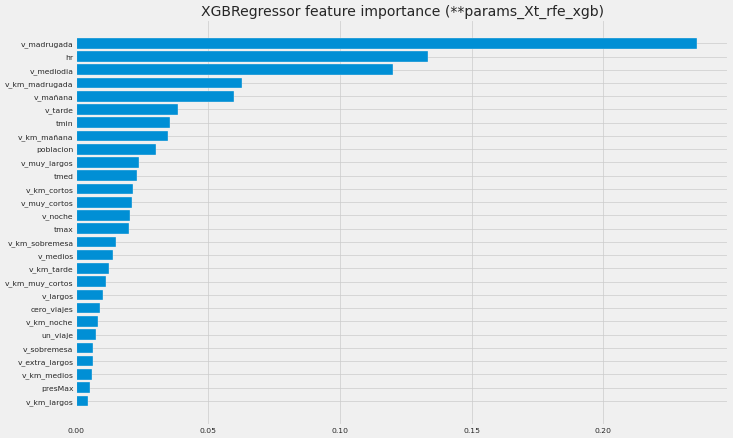

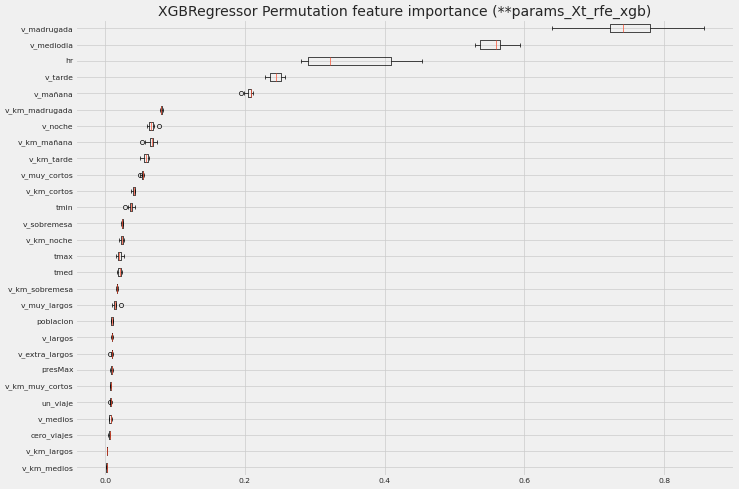

In [70]:
modelo_final  = xgb.XGBRegressor(**params_Xt_rfe_xgb) ### xgbparams
X_train, X_test, y_train, y_test = train_test_split(Xt_rfe_xgb, labels, test_size = TEST_SIZE, random_state = RANDOM_STATE)

modelo_final.fit(X_train,y_train)
pred = modelo_final.predict(X_test)
    
eftEntrenamiento = modelo_final.score (X_train, y_train)
eftPrediccion = modelo_final.score (X_test, y_test)  
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

print([Xt_rfe_xgb.shape[1], eftEntrenamiento, eftPrediccion, rmse, mae])

importancias = pd.DataFrame({'XGBRegressor(**params_Xt_rfe_xgb)' : modelo_final.feature_importances_ })
pos = np.arange(np.argsort(importancias['XGBRegressor(**params_Xt_rfe_xgb)']).shape[0]) + .5
sorted_imp = importancias['XGBRegressor(**params_Xt_rfe_xgb)'].argsort()

print("Dimension :", Xt_rfe_xgb.shape[1])
print("Cols :", Xt_rfe_xgb.columns)
lista = Xt_rfe_xgb.columns
atributos_rfe_xgb = [lista_variables[int(x)] for x in lista]

fig = plt.figure(figsize=(15,10))
#plt.subplot(1, 2, 1)
#plt.barh(pos, importancias['best_grid_ada_rfa'][np.argsort(importancias['best_grid_ada_rfa'])], align='center')
plt.barh(pos, importancias['XGBRegressor(**params_Xt_rfe_xgb)'][sorted_imp], align='center')

plt.yticks((pos), np.array(atributos_rfe_xgb)[sorted_imp])
           #np.array(features)[np.argsort(importancias['best_grid_ada_rfa'])])
plt.title('XGBRegressor feature importance (**params_Xt_rfe_xgb)')
plt.show()


perm_imp = permutation_importance(modelo_final, X_test, y_test, n_repeats=10, random_state=RANDOM_STATE, n_jobs=2)
sorted_idx = perm_imp.importances_mean.argsort()
fig = plt.figure(figsize=(15,10))

plt.boxplot(perm_imp.importances[sorted_idx].T, vert=False, labels=np.array(atributos_rfe_xgb)[sorted_idx])
plt.title("XGBRegressor Permutation feature importance (**params_Xt_rfe_xgb)")
fig.tight_layout()
plt.show();


In [71]:
importancias

,XGBRegressor(**params_Xt_rfe_xgb)
0,0.021356
1,0.014143
2,0.010140
3,0.023938
4,0.006392
5,0.020455
6,0.235619
7,0.059751
8,0.120047
9,0.006610


In [2]:
select.get_support()

NameError: name 'select' is not defined

In [72]:
select.get_support()
atributos_selk_ada_l = [lista_variables and select.get_support()]
atributos_selk_ada_l

[array([ True,  True, False, False, False, False, False,  True,  True,
         True,  True, False,  True,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False,  True,  True])]

In [72]:
lista_variables

['v_muy_cortos',
 'v_cortos',
 'v_medios',
 'v_largos',
 'v_muy_largos',
 'v_extra_largos',
 'v_noche',
 'v_madrugada',
 'v_mañana',
 'v_mediodia',
 'v_sobremesa',
 'v_tarde',
 'v_km_muy_cortos',
 'v_km_cortos',
 'v_km_medios',
 'v_km_largos',
 'v_km_muy_largos',
 'v_km_extra_largos',
 'v_km_noche',
 'v_km_madrugada',
 'v_km_mañana',
 'v_km_mediodia',
 'v_km_sobremesa',
 'v_km_tarde',
 'cero_viajes',
 'un_viaje',
 'dos_viajes',
 'mas_de_dos_viajes',
 'altitud',
 'velmedia',
 'tmin',
 'tmed',
 'tmax',
 'presMin',
 'presMax',
 'sol',
 'prec',
 'hr',
 'poblacion']

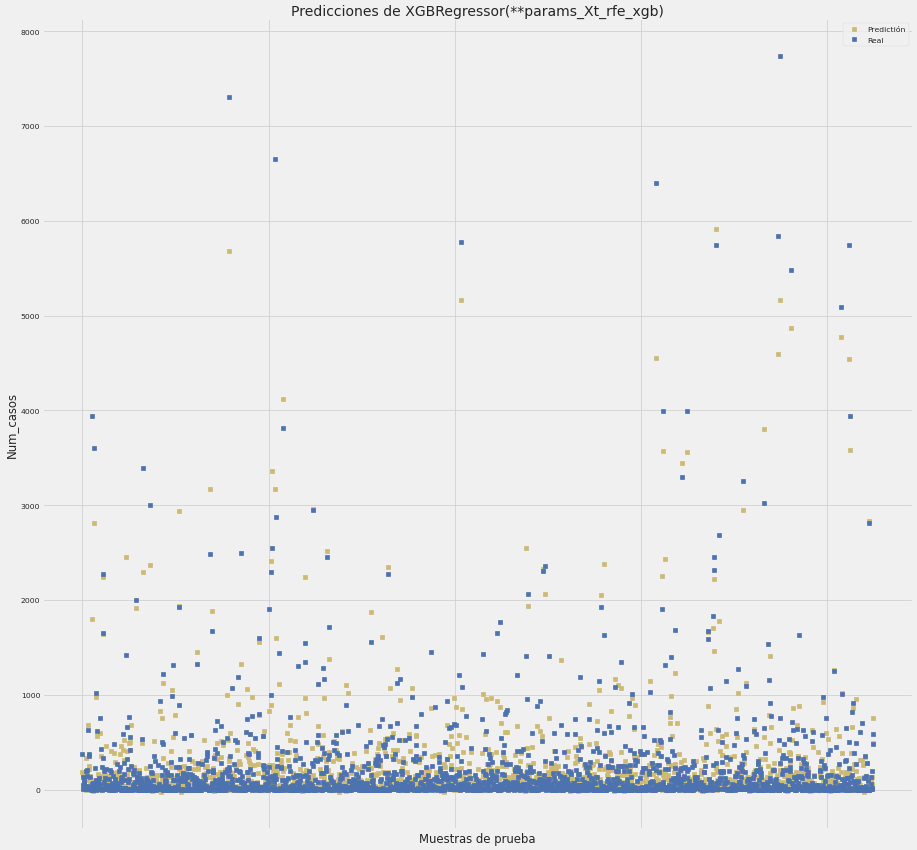

In [73]:
lista = [i for i in range(0,y_test.values.shape[0])]
xx = np.stack(lista)
plt.figure(figsize=(20,20))
plt.plot(xx, pred, "ys" ,label="Predictión")
plt.plot(xx, y_test, "bs" ,label="Real")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("Num_casos")
plt.xlabel("Muestras de prueba")
plt.legend(loc="best")
plt.title("Predicciones de XGBRegressor(**params_Xt_rfe_xgb)")
plt.show()

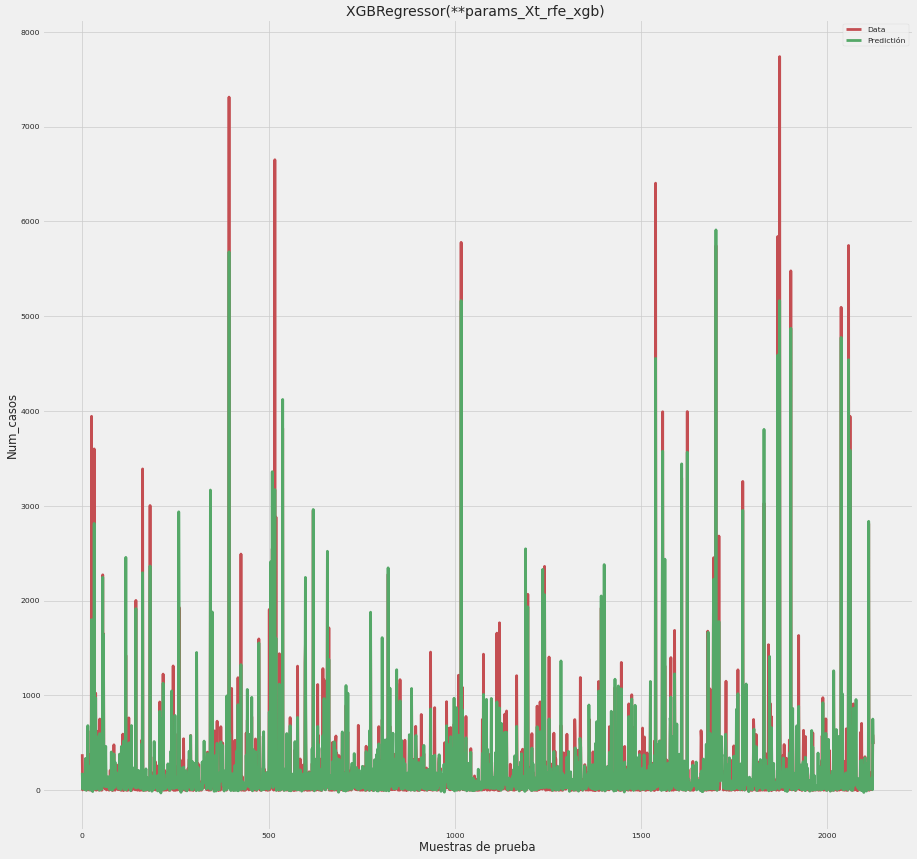

In [74]:
plt.figure(figsize=(20,20))
plt.plot(xx, y_test, c='r', label='Data')
#plt.plot(xx, y, c='k', label='data')
plt.ylabel("Num_casos")
plt.xlabel("Muestras de prueba")
plt.plot(xx, pred, c='g', label='Predictión')
plt.axis('tight')
plt.legend()
plt.title("XGBRegressor(**params_Xt_rfe_xgb) " )

plt.show()

----  

## Save results

In [75]:
metricas_modelos = pd.DataFrame(modelado,
                                columns=['Método', 'Modelo',  "#Feats", 'ScoreTest', 'RMSE',  'MAE', 'MAPE'])
nombre = 'tarjeta_datos_0.csv'

metricas_modelos.to_csv("~/Trabajo_tfm/datos_csv/modelos_" + nombre )
metricas_modelos.shape

(44, 7)

In [76]:
modelado

[['base', 'RandomForest', 39, 0.82, 250.1, 97.78, 45.27],
 ['base', 'Xgboost', 39, 0.81, 256.24, 98.29, 45.51],
 ['base', 'GradBoost', 39, 0.75, 296.73, 133.81, 61.95],
 ['base', 'Adaboost', 39, 0.85, 229.29, 99.99, 46.3],
 ['SelectKBest', 'XGBRegressor', 22, 0.882, 202.42, 91.128, 42.193],
 ['SelectPercentile', 'XGBRegressor', 36, 0.826, 246.085, 91.535, 42.381],
 ['SmartCorrelatedSelection',
  'XGBRegressor',
  28,
  0.859,
  221.552,
  94.891,
  43.935],
 ['DropCorrelatedFeatures', 'XGBRegressor', 26, 0.861, 219.33, 94.169, 43.601],
 ['base', 'RandomForest', 26, 0.82, 248.81, 99.09, 45.88],
 ['base', 'Xgboost', 26, 0.86, 219.33, 94.17, 43.6],
 ['base', 'GradBoost', 26, 0.73, 306.34, 137.67, 63.74],
 ['base', 'Adaboost', 26, 0.87, 213.25, 98.24, 45.48],
 ['RecursiveFeatureAddition',
  'XGBRegressor',
  16,
  0.844,
  232.62,
  92.865,
  42.997],
 ['RecursiveFeatureElimination',
  'XGBRegressor',
  28,
  0.824,
  247.076,
  97.117,
  44.966],
 ['SelectKBest', 'AdaBoost(xgb)', 27, 0.88

In [77]:
metricas_modelos

,Método,Modelo,#Feats,ScoreTest,RMSE,MAE,MAPE
0,base,RandomForest,39,0.820,250.100,97.780,45.270
1,base,Xgboost,39,0.810,256.240,98.290,45.510
2,base,GradBoost,39,0.750,296.730,133.810,61.950
3,base,Adaboost,39,0.850,229.290,99.990,46.300
4,SelectKBest,XGBRegressor,22,0.882,202.420,91.128,42.193
5,SelectPercentile,XGBRegressor,36,0.826,246.085,91.535,42.381
6,SmartCorrelatedSelection,XGBRegressor,28,0.859,221.552,94.891,43.935
7,DropCorrelatedFeatures,XGBRegressor,26,0.861,219.330,94.169,43.601
8,base,RandomForest,26,0.820,248.810,99.090,45.880
9,base,Xgboost,26,0.860,219.330,94.170,43.600


In [78]:
print(" %.2f seconds for  hiperparameter settings."  % ((time.time() - clock_0)))

 10698.91 seconds for  hiperparameter settings.


## Provincias

In [79]:
clock_1 = time.time()

In [80]:
def clima_provincia(row): # transfoma la provincia a mayusculas para unificar con otros ficheros
    if row.provincia in ['LA_CORUÑA', 'LUGO','ORENSE', 'PONTEVEDRA', 'HUELVA' ] :
        return "Atlantico"
    elif row.provincia in ['VALENCIA','ALICANTE','ALMERIA', 'CADIZ','GRANADA', 'MALAGA' ] :
        return "Mediterraneo"
    else:
        return "Continental"

In [81]:
clima = tarjeta.apply(lambda row: clima_provincia(row), axis=1) 
tarjeta.insert(32,'clima', clima)# evolucion.head()

atlantico = tarjeta[tarjeta.clima == "Atlantico"].copy()
mediterraneo = tarjeta[tarjeta.clima == "Mediterraneo"].copy()
continental = tarjeta[tarjeta.clima == "Continental"].copy()

atlantico= atlantico.select_dtypes(exclude=['object'])
mediterraneo= mediterraneo.select_dtypes(exclude=['object'])
continental= continental.select_dtypes(exclude=['object'])

AttributeError: 'Series' object has no attribute 'provincia'

In [ ]:
X_atlantico = atlantico.drop(columns=['num_casos']).select_dtypes(exclude=['object'])
Y_atlantico = atlantico[['num_casos']]
features_a = X_atlantico.columns
labels_a = Y_atlantico.num_casos

X_norm_a = scaler.fit_transform(X_atlantico)

In [ ]:
X_mediterraneo = mediterraneo.drop(columns=['num_casos']).select_dtypes(exclude=['object'])
Y_mediterraneo = mediterraneo[['num_casos']]
features_m = X_mediterraneo.columns
labels_m = Y_mediterraneo.num_casos
    
X_norm_m = scaler.fit_transform(X_mediterraneo)

In [ ]:
X_continental = continental.drop(columns=['num_casos']).select_dtypes(exclude=['object'])
Y_continental = continental[['num_casos']]
features_c = X_continental.columns
labels_c = Y_continental.num_casos
    
X_norm_c = scaler.fit_transform(X_continental)

In [ ]:
def skb_regional(X_norm, labels, zona) :
    
    select = SelectKBest(score_func = mutual_info_regression, k='all')

    X_best_mi = select.fit_transform(X_norm, labels.num_casos) 
    
    X_train, X_test, y_train, y_test = train_test_split(X_best_mi, labels.num_casos, test_size = TEST_SIZE, random_state = RANDOM_STATE)
       
    gxb = GridSearchCV(xgb.XGBRegressor(random_state=RANDOM_STATE ), *param_grid, cv=kfcv,  
                       scoring = 'neg_mean_absolute_error',
                        verbose=1, refit = "mae", return_train_score=True, n_jobs=multiprocessing.cpu_count() // 2)
    
    gxb.fit(X_train, y_train)

    results = gxb.cv_results_
    print("best_score_ : ",gxb.best_score_)
    print("best_params_ : ",gxb.best_params_)
    # el mejor modelo
    mejor_modelo = gxb.best_estimator_

    # Entrenamiento del mejor modelo obtenido
    mejor_modelo.fit(X_train, y_train) 

    # nueva predicción 
    prediction = mejor_modelo.predict(X_test)
 
    eftEntrenamiento = mejor_modelo.score(X_train, y_train)
    eftPrediccion = mejor_modelo.score(X_test, y_test)
    rmse = np.sqrt(mean_squared_error(y_test, prediction))

    mae = mean_absolute_error(y_test, prediction)
    
    media_casos_reales = np.mean(y_test)
    porcentaje = mae *100  / media_casos_reales
    print("MAE : ",mae, "porcentaje :", porcentaje, "tamaño :", X_best_mi.shape[1])

    return (['SKB-GridSearchCV', zona,'%.3f'%(porcentaje),'%.3f'%(X_best_mi.shape[1]), '%.3f'%(media_casos_reales), '%.3f'%(eftPrediccion),
             '%.3f'%(rmse), '%.3f'%(mae)])


In [ ]:
def dcf_regional(X_norm, labels, zona) :
    
    trh_dcf = DropCorrelatedFeatures(variables=None, method='spearman', threshold=0.957692) 

    X_t  = trh_dcf.fit_transform(X_norm, labels.num_casos)
    
    X_train, X_test, y_train, y_test = train_test_split(X_t , labels.num_casos, test_size = TEST_SIZE, random_state = RANDOM_STATE)
        
    gxb = GridSearchCV(xgb.XGBRegressor(random_state=RANDOM_STATE ), *param_grid, cv=kfcv,
                       scoring = 'neg_mean_absolute_error',
                        verbose=1, refit = "mae", return_train_score=True, n_jobs=multiprocessing.cpu_count() // 2)
    
    gxb.fit(X_train, y_train)

    results = gxb.cv_results_
    print("best_score_ : ",gxb.best_score_)
    print("best_params_ : ",gxb.best_params_)
    # el mejor modelo
    mejor_modelo = gxb.best_estimator_

    # Entrenamiento del mejor modelo obtenido
    mejor_modelo.fit(X_train, y_train) 

    # nueva predicción 
    prediction = mejor_modelo.predict(X_test)
 
    eftEntrenamiento = mejor_modelo.score(X_train, y_train)
    eftPrediccion = mejor_modelo.score(X_test, y_test)
    rmse = np.sqrt(mean_squared_error(y_test, prediction))

    mae = mean_absolute_error(y_test, prediction)
    
    media_casos_reales = np.mean(y_test)
    porcentaje = mae *100  / media_casos_reales
    print("MAE : ",mae, "porcentaje :", porcentaje, "tamaño :", X_t.shape[1])

    return (['DCF-GridSearchCV', zona, '%.3f'%(porcentaje),'%.3f'%(X_t.shape[1]), '%.3f'%(media_casos_reales), '%.3f'%(eftPrediccion),
             '%.3f'%(rmse), '%.3f'%(mae)])


In [ ]:
def rfa_regional(X_norm, labels, zona) :
    
    trrec_ad = RecursiveFeatureAddition(estimator=xgb.XGBRegressor(random_state=RANDOM_STATE),  scoring="neg_mean_absolute_error", cv=kfcv)

    Xt_trrec_ad = trrec_ad.fit_transform(X_norm, labels.num_casos)
    
    X_train, X_test, y_train, y_test = train_test_split(Xt_trrec_ad, labels.num_casos, test_size = TEST_SIZE, random_state = RANDOM_STATE)

    gxb = GridSearchCV(xgb.XGBRegressor(random_state=RANDOM_STATE ), *param_grid, cv=kfcv,
                       scoring = 'neg_mean_absolute_error',
                       verbose=1, refit = "mae", return_train_score=True, n_jobs=multiprocessing.cpu_count() // 2)
   
    gxb.fit(X_train, y_train)

    results = gxb.cv_results_
    print("best_score_ : ",gxb.best_score_)
    print("best_params_ : ",gxb.best_params_)
    # el mejor modelo
    mejor_modelo = gxb.best_estimator_

    # Entrenamiento del mejor modelo obtenido
    mejor_modelo.fit(X_train, y_train) 

    # nueva predicción 
    prediction = mejor_modelo.predict(X_test)
 
    eftEntrenamiento = mejor_modelo.score(X_train, y_train)
    eftPrediccion = mejor_modelo.score(X_test, y_test)
    rmse = np.sqrt(mean_squared_error(y_test, prediction))

    mae = mean_absolute_error(y_test, prediction)
    
    media_casos_reales = np.mean(y_test)
    porcentaje = mae *100  / media_casos_reales
    print("MAE : ",mae, "porcentaje :", porcentaje, "tamaño :", Xt_trrec_ad.shape[1])

    return (['RFA-GridSearchCV', zona, '%.3f'%(porcentaje),'%.3f'%(Xt_trrec_ad.shape[1]), '%.3f'%(media_casos_reales), '%.3f'%(eftPrediccion),
             '%.3f'%(rmse), '%.3f'%(mae)])


In [ ]:
def rfe_regional(X_norm, labels, zona) :
    
    trrec = RecursiveFeatureElimination(estimator=xgb.XGBRegressor(random_state=RANDOM_STATE), scoring="neg_mean_absolute_error", cv=kfcv)

    Xt_rfe = trrec.fit_transform(X_norm, labels.num_casos)
    
    X_train, X_test, y_train, y_test = train_test_split(Xt_rfe, labels.num_casos, test_size = TEST_SIZE, random_state = RANDOM_STATE)

    gxb = GridSearchCV(xgb.XGBRegressor(random_state=RANDOM_STATE ), *param_grid, cv=kfcv,
                       scoring = 'neg_mean_absolute_error',
                       verbose=1, refit = "mae", return_train_score=True, n_jobs=multiprocessing.cpu_count() // 2)
   
    gxb.fit(X_train, y_train)

    results = gxb.cv_results_
    print("best_score_ : ",gxb.best_score_)
    print("best_params_ : ",gxb.best_params_)
    # el mejor modelo
    mejor_modelo = gxb.best_estimator_

    # Entrenamiento del mejor modelo obtenido
    mejor_modelo.fit(X_train, y_train) 

    # nueva predicción 
    prediction = mejor_modelo.predict(X_test)
 
    eftEntrenamiento = mejor_modelo.score(X_train, y_train)
    eftPrediccion = mejor_modelo.score(X_test, y_test)
    rmse = np.sqrt(mean_squared_error(y_test, prediction))

    mae = mean_absolute_error(y_test, prediction)
    
    media_casos_reales = np.mean(y_test)
    porcentaje = mae *100  / media_casos_reales
    print("MAE : ",mae, "porcentaje :", porcentaje, "tamaño :", Xt_rfe.shape[1])

    return (['RFE-GridSearchCV', zona, '%.3f'%(porcentaje),'%.3f'%(Xt_rfe.shape[1]), '%.3f'%(media_casos_reales), '%.3f'%(eftPrediccion),
             '%.3f'%(rmse), '%.3f'%(mae)])


### Climas

In [ ]:
modelado_reg = []

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm_a, labels_a, test_size = TEST_SIZE, random_state = RANDOM_STATE)

best_grid_ada_rfa.fit(X_train,y_train)
pred = best_grid_ada_rfa.predict(X_test)
    
eftEntrenamiento = best_grid_ada_rfa.score (X_train, y_train)
eftPrediccion = best_grid_ada_rfa.score (X_test, y_test)  
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

media_casos_reales = np.mean(y_test)
porcentaje = mae *100  / media_casos_reales

modelado_reg.append(['best_grid_ada_rfa', "Atlantico", '%.3f'%(porcentaje),'%.3f'%(X_continental.shape[1]), 
                     '%.3f'%(media_casos_reales), '%.3f'%(eftPrediccion),
                     '%.3f'%(rmse), '%.3f'%(mae)])


print([X_norm_a.shape[1], eftEntrenamiento, eftPrediccion, rmse, mae])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm_m, labels_m, test_size = TEST_SIZE, random_state = RANDOM_STATE)

best_grid_ada_rfa.fit(X_train,y_train)
pred = best_grid_ada_rfa.predict(X_test)
    
eftEntrenamiento = best_grid_ada_rfa.score (X_train, y_train)
eftPrediccion = best_grid_ada_rfa.score (X_test, y_test)  
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

media_casos_reales = np.mean(y_test)
porcentaje = mae *100  / media_casos_reales

modelado_reg.append(['best_grid_ada_rfa', "Mediterraneo", '%.3f'%(porcentaje),'%.3f'%(X_continental.shape[1]), 
                     '%.3f'%(media_casos_reales), '%.3f'%(eftPrediccion),
                     '%.3f'%(rmse), '%.3f'%(mae)])

print([X_norm_m.shape[1], eftEntrenamiento, eftPrediccion, rmse, mae])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm_c, labels_c, test_size = TEST_SIZE, random_state = RANDOM_STATE)

best_grid_ada_rfa.fit(X_train,y_train)
pred = best_grid_ada_rfa.predict(X_test)
    
eftEntrenamiento = best_grid_ada_rfa.score (X_train, y_train)
eftPrediccion = best_grid_ada_rfa.score (X_test, y_test)  
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

media_casos_reales = np.mean(y_test)
porcentaje = mae *100  / media_casos_reales

modelado_reg.append(['best_grid_ada_rfa', "Continental", '%.3f'%(porcentaje),'%.3f'%(X_continental.shape[1]), 
                     '%.3f'%(media_casos_reales), '%.3f'%(eftPrediccion),
                     '%.3f'%(rmse), '%.3f'%(mae)])

print([X_norm_c.shape[1], eftEntrenamiento, eftPrediccion, rmse, mae])

In [ ]:
modelado_reg.append(dcf_regional(X_atlantico, Y_atlantico, 'Atlantico'))
modelado_reg.append(rfa_regional(X_atlantico, Y_atlantico, 'Atlantico'))
modelado_reg.append(skb_regional(X_atlantico, Y_atlantico, 'Atlantico'))
modelado_reg.append(rfe_regional(X_atlantico, Y_atlantico, 'Atlantico'))

modelado_reg.append(dcf_regional(X_mediterraneo, Y_mediterraneo, 'Mediterraneo'))
modelado_reg.append(rfa_regional(X_mediterraneo, Y_mediterraneo, 'Mediterraneo'))
modelado_reg.append(skb_regional(X_mediterraneo, Y_mediterraneo, 'Mediterraneo'))
modelado_reg.append(rfe_regional(X_mediterraneo, Y_mediterraneo, 'Mediterraneo'))

modelado_reg.append(dcf_regional(X_continental, Y_continental, 'Continental'))
modelado_reg.append(rfa_regional(X_continental, Y_continental, 'Continental'))
modelado_reg.append(skb_regional(X_continental, Y_continental, 'Continental'))
modelado_reg.append(rfe_regional(X_continental, Y_continental, 'Continental'))

### Provincias

In [ ]:
for prov in tarjeta.provincia.unique().tolist():
    
    X_provs = tarjeta[tarjeta.provincia == prov].drop(columns=['num_casos']).select_dtypes(exclude=['object'])
    label_provs =tarjeta[tarjeta.provincia == prov][['num_casos']]
    X_train, X_test, y_train, y_test = train_test_split(X_provs, label_provs.num_casos, test_size = TEST_SIZE, random_state = RANDOM_STATE)
    
    best_grid_ada_rfa.fit(X_train,y_train)
    pred = best_grid_ada_rfa.predict(X_test)
    
    eftEntrenamiento = best_grid_ada_rfa.score (X_train, y_train)
    eftPrediccion = best_grid_ada_rfa.score (X_test, y_test)  
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))

    media_casos_reales = np.mean(y_test)
    porcentaje = mae * 100 / media_casos_reales

    modelado_reg.append(['best_grid_ada_rfa', prov, '%.3f'%(porcentaje),'%.3f'%(X_continental.shape[1]),
                         '%.3f'%(media_casos_reales), '%.3f'%(eftPrediccion), '%.3f'%(rmse), '%.3f'%(mae)])


In [ ]:
for prov in tarjeta.provincia.unique().tolist():
    X_provs = tarjeta[tarjeta.provincia == prov].drop(columns=['num_casos']).select_dtypes(exclude=['object'])
    label_provs =tarjeta[tarjeta.provincia == prov][['num_casos']]
    print ("Provincia : ", prov)
    modelado_reg.append(dcf_regional(X_provs, label_provs, prov ))
    modelado_reg.append(rfa_regional(X_provs, label_provs, prov ))
    modelado_reg.append(skb_regional(X_provs, label_provs, prov ))
    modelado_reg.append(rfe_regional(X_provs, label_provs, prov ))

    print ("-- --"*5)

## Resultados Climas y provincias

In [ ]:
modelado_reg

In [ ]:
metricas_modelos = pd.DataFrame(modelado_reg,
                                columns=['Método', 'Modelo', 'Prcnt', "#Feats", 'media_casos_reales', 'ScoreTest', 'RMSE',  'MAE'])
nombre = 'datos_regionales_hiperparametros_0.csv'

metricas_modelos.to_csv("~/Trabajo_tfm/datos_csv/modelos_" + nombre )

In [ ]:
metricas_modelos[:50]

In [ ]:
metricas_modelos[50:]

In [ ]:
print(" %.2f seconds for  provinces hiperparameter settings."  % ((time.time() - clock_1)))

In [ ]:
print(" %.2f seconds for  hiperparameter settings."  % ((time.time() - clock_0)))

In [ ]:
valores = metricas_modelos['MAE'].values
lista_variables = list(features)
lista = modelo_final.get_support()
[lista_variables[x] for x in lista]

pos = np.arange(np.argsort(metricas_modelos['MAE']).shape[0]) + .5
fig = plt.figure(figsize=(15,10))
#plt.subplot(1, 2, 1)
plt.barh(pos, metricas_modelos['MAE'][np.argsort(metricas_modelos['MAE'])], align='center')
plt.yticks(pos, np.array(features)[np.argsort(metricas_modelos['MAE'])])
plt.title('Importancia de los atributos para best_grid_ada_rfe')
plt.show()

In [ ]:

pos = np.arange(np.argsort(metricas_modelos['MAE']).shape[0]) + .5
fig = plt.figure(figsize=(15,10))
plt.barh(pos, metricas_modelos['MAE'][np.argsort(metricas_modelos['MAE'])], align='center')
plt.yticks(pos, np.array(features)[np.argsort(metricas_modelos['MAE'])])
plt.title('Valores de mae para climas y provincias')
plt.show()

